# LIMPIEZA DEL DATASET PROPERATI: Parte 1

URL Presentación: https://view.genial.ly/658ad4540af3130014737e3c/presentation-dhds-tp1-grupo-4
La presentación es autonavegable y si bien el nivel técnico es menor, cuenta con una versión corta y simplificada.

Comenzamos con la importación de las librerías que utilizaremos.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats

import warnings 
warnings.filterwarnings('ignore')

Importamos el Dataset en formato csv indicando la separación por comas, y llamamos al Dataset "data".

Llamamos a las primeras filas para observar cómo es la información contenida en el dataset y tenerla como referencia a la hora de tomar decisiones sobre las estrategias de limpieza.

In [2]:
properati_path = "C:/Users/Tefi/OneDrive/Documentos/GitHub/Proyectos_DH/03_tasacion_propiedades/properati.csv"

# Leer el archivo CSV desde path
data = pd.read_csv(properati_path, sep=",",index_col=0)

data.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [3]:
data.shape

(121220, 25)

Visualizamos el tamaño del dataset con el método shape y observamos que tiene 121220 filas y 25 columnas (+ ID).

Hacemos una primera vista del tipo de datos con el que estaremos trabajando en cada columna.

In [4]:
data.dtypes

operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: object

## <u> Parte 1: Limpieza del Dataset


Cuantificamos los valores nulos en cada columna, y luego los analizamos como porcentaje del total de registros.

In [5]:
suma_nulos = data.isnull().sum()
suma_nulos

operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [6]:
porcentaje_nulls = (suma_nulos / data.shape[0]) * 100
porcentaje_nulls.round(2)

operation                      0.00
property_type                  0.00
place_name                     0.02
place_with_parent_names        0.00
country_name                   0.00
state_name                     0.00
geonames_id                   15.44
lat-lon                       42.53
lat                           42.53
lon                           42.53
price                         16.84
currency                      16.84
price_aprox_local_currency    16.84
price_aprox_usd               16.84
surface_total_in_m2           32.44
surface_covered_in_m2         16.42
price_usd_per_m2              43.39
price_per_m2                  27.69
floor                         93.48
rooms                         60.91
expenses                      88.23
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                2.57
dtype: float64

Creamos gráficos de torta con las columnas de mayor interés para observar proporción entre valores null y válidos.
Algunas de estas columnas serán reemplazadas en la comparación final por sus análogas "_clean".

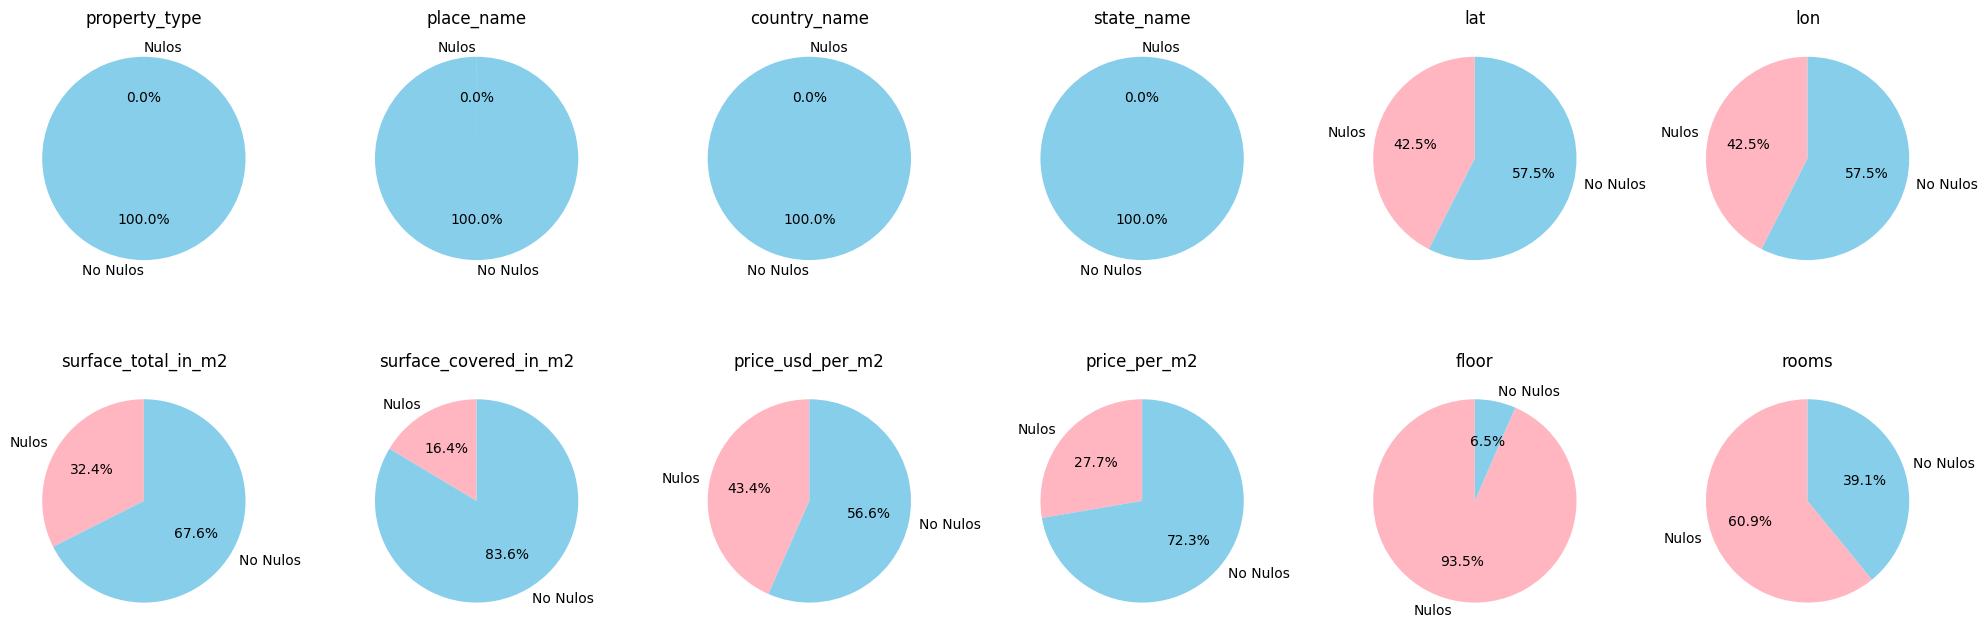

In [7]:
# Generamos un diccionario con los datos a graficar y definimos los valores "nulos" y "no nulos" (100-nulos)
nulos_por_columna = {
    'property_type': 0.000000,
    'place_name': 0.018974,
    'country_name': 0.000000,
    'state_name': 0.000000,
    'lat': 42.525986,
    'lon': 42.525986,
    'surface_total_in_m2': 32.443491,
    'surface_covered_in_m2': 16.422208,
    'price_usd_per_m2': 43.394654,
    'price_per_m2': 27.686850,
    'floor': 93.483749,
    'rooms': 60.905791,
}

df_nulos = pd.DataFrame.from_dict(nulos_por_columna, orient='index', columns=['Porcentaje'])
df_nulos['No Nulos'] = 100 - df_nulos['Porcentaje']

# Establecemos colores de referencia
palette = ['#FFB6C1', '#87CEEB']

# Armado grid
fig, axes = plt.subplots(2, 6, figsize=(20, 7))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Gráficos de torta
for i, (column, data1) in enumerate(df_nulos.iterrows()):
    ax = axes[i]
    ax.pie(data1, labels=['Nulos', 'No Nulos'], autopct='%1.1f%%', startangle=90, colors=palette)
    ax.set_title(column)

plt.tight_layout()
plt.show()

### 1) Trabajo con columnas categóricas

Decidimos comenzar con un paso relativamente simple, que es evaluar las columnas categóricas que no contienen valores nulos, para conocer valores únicos y posibles errores de tipeo o demás que puedan afectar, por ejemplo, la agregación de la información o la aplicación de una correlación. 

Además haremos un análisis preliminar, en los casos que sea posible.

- Tipo de operación (columna 'operation')

In [8]:
operations_unique = data['operation'].unique()
operations_unique

array(['sell'], dtype=object)

- Tipo de propiedad (columna 'property_type')

In [9]:
property_type_unique = data['property_type'].unique()
property_type_unique

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [10]:
property_type_counts = data['property_type'].value_counts()
property_type_counts

property_type
apartment    71065
house        40268
PH            5751
store         4136
Name: count, dtype: int64

- País en el que se encuentra la propiedad (columna 'country_name')

In [11]:
country_name_unique = data['country_name'].unique()
country_name_unique

array(['Argentina'], dtype=object)

- Provincia / área en la que se encuentra la propiedad (columna 'state_name')

In [12]:
state_name_unique = data['state_name'].unique()
state_name_unique

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
       'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [13]:
state_name_counts = data['state_name'].value_counts()
state_name_counts

state_name
Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
S

Generamos un diccionario separado para el AMBA, para poder observar mejor estas categorías tanto en un histograma como en mapas.

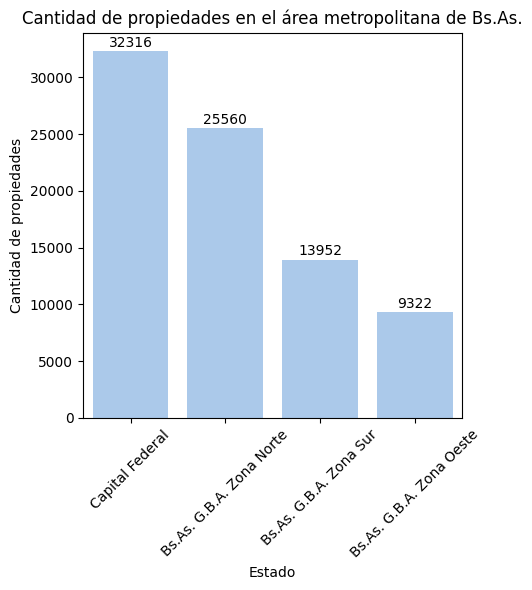

In [14]:
amba_counts = {
    'state_name_amba': [
        'Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur',
        'Bs.As. G.B.A. Zona Oeste',
    ],
    'counts_amba': [
        32316, 25560, 13952, 9322
    ]
}

amba_counts = pd.DataFrame(amba_counts)

plt.figure(figsize=(5, 6))
sns.set_palette('pastel')
sns.barplot(data=amba_counts, x='state_name_amba', y='counts_amba')
plt.title('Cantidad de propiedades en el área metropolitana de Bs.As.')
plt.xlabel('Estado')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation=45)

for index, value in enumerate(amba_counts['counts_amba']):
    plt.text(index, value + 100, str(value), ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

Para integrarlos al histograma del resto del  (respetando la división política), agregamos todos los valores que representen a la provincia de Buenos Aires.

In [15]:
propiedades_bsas = ['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Buenos Aires Costa Atlántica', 'Bs.As. G.B.A. Zona Oeste', 'Buenos Aires Interior']

sumatoria_propiedades_bsas = data[data['state_name'].isin(propiedades_bsas)]['state_name'].value_counts().sum()
sumatoria_propiedades_bsas

61131

Por otro lado integramos la Provincia de Buenos Aires entera al resto de las categorías para poder observarla en un mapa respetando la división política de nuestro país.

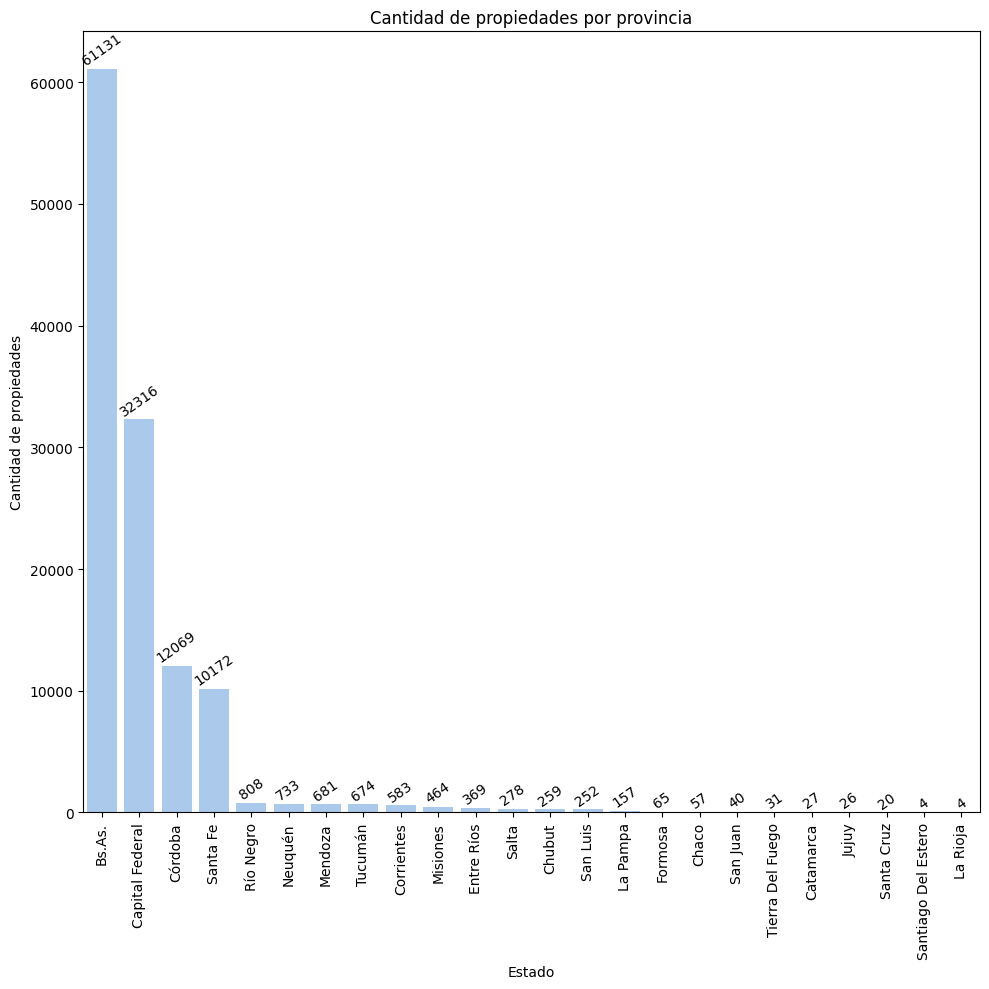

In [16]:
provincias_argentina_counts = {
    'state_name_arg': [
        'Bs.As.', 'Capital Federal', 'Córdoba', 'Santa Fe', 'Río Negro', 'Neuquén', 'Mendoza', 'Tucumán',
        'Corrientes', 'Misiones', 'Entre Ríos', 'Salta', 'Chubut', 'San Luis',
        'La Pampa', 'Formosa', 'Chaco', 'San Juan', 'Tierra Del Fuego',
        'Catamarca', 'Jujuy', 'Santa Cruz', 'Santiago Del Estero', 'La Rioja'
    ],
    'counts_arg': [
        61131, 32316, 12069, 10172, 808, 733, 681,
        674, 583, 464, 369, 278, 259, 252, 157, 65, 57, 40, 31, 27, 26, 20, 4, 4
    ]
}

provincias_argentina_counts = pd.DataFrame(provincias_argentina_counts)

plt.figure(figsize=(10, 10))
sns.set_palette('pastel')
sns.barplot(data=provincias_argentina_counts, x='state_name_arg', y='counts_arg')
plt.title('Cantidad de propiedades por provincia')
plt.xlabel('Estado')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation=90)

for index, value in enumerate(provincias_argentina_counts['counts_arg']):
    plt.text(index, value + 100, str(value), ha='center', va='bottom', rotation=35)

plt.tight_layout()
plt.show()


<u>Conclusiones:<u> En estos casos, aparentemente no habría errores de tipeo en las categorías utilizadas, por lo cual no consideramos necesario seguir procesando esta información de forma aislada.

### 2) Análisis high level de columnas numéricas

Observamos cuáles son las columnas con datos numéricos.

In [17]:
columnas_num = data.select_dtypes(include='float')
columnas_num

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
0,3430787.0,-34.661824,-58.508839,62000.0,1093959.00,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN
1,3432039.0,-34.903883,-57.964330,150000.0,2646675.00,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3430787.0,-34.652262,-58.522982,72000.0,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN
3,3431333.0,-34.647797,-58.516424,95000.0,1676227.50,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3435548.0,-38.002626,-57.549447,64000.0,1129248.00,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,3436077.0,NaN,NaN,870000.0,15350715.00,870000.0,113.0,93.0,7699.115044,9354.838710,NaN,NaN,10000.0
121216,3436080.0,NaN,NaN,498000.0,8786961.00,498000.0,360.0,360.0,1383.333333,1383.333333,NaN,NaN,NaN
121217,3433775.0,-34.570639,-58.475596,131500.0,2320251.75,131500.0,46.0,39.0,2858.695652,3371.794872,NaN,NaN,NaN
121218,NaN,NaN,NaN,95900.0,1692107.55,95900.0,48.0,48.0,1997.916667,1997.916667,NaN,NaN,NaN


Las columnas de valores y superficies la redondeamos a dos decimales

In [18]:
columnas_num_p = ['price', 'currency','price_aprox_local_currency', 'price_aprox_usd','price_usd_per_m2', 'price_per_m2','surface_covered_in_m2']
data[columnas_num_p] = data[columnas_num_p].round(2)
data[columnas_num_p]

,price,currency,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,price_per_m2,surface_covered_in_m2
0,62000.0,USD,1093959.00,62000.0,1127.27,1550.00,40.0
1,150000.0,USD,2646675.00,150000.0,NaN,NaN,NaN
2,72000.0,USD,1270404.00,72000.0,1309.09,1309.09,55.0
3,95000.0,USD,1676227.50,95000.0,NaN,NaN,NaN
4,64000.0,USD,1129248.00,64000.0,1828.57,1828.57,35.0
...,...,...,...,...,...,...,...
121215,870000.0,USD,15350715.00,870000.0,7699.12,9354.84,93.0
121216,498000.0,USD,8786961.00,498000.0,1383.33,1383.33,360.0
121217,131500.0,USD,2320251.75,131500.0,2858.70,3371.79,39.0
121218,95900.0,USD,1692107.55,95900.0,1997.92,1997.92,48.0


Analisis a high level de las columnas relacionadas con precio y superficie

In [19]:
data[columnas_num_p].describe().round(2)

,price,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,price_per_m2,surface_covered_in_m2
count,1.008100e+05,1.008100e+05,100810.00,68617.00,87658.00,101313.00
mean,4.685259e+05,4.229397e+06,239700.58,2160.09,6912.22,133.05
std,2.260101e+06,6.904714e+06,391323.88,2759.29,28378.64,724.35
min,0.000000e+00,0.000000e+00,0.00,0.60,1.51,0.00
25%,1.100000e+05,1.583309e+06,89733.88,1218.18,1550.00,45.00
50%,1.850000e+05,2.558452e+06,145000.00,1800.00,2213.11,75.00
75%,4.200000e+05,4.675792e+06,265000.00,2486.41,3355.55,150.00
max,6.500000e+08,8.212711e+08,46545445.00,206333.33,3999999.96,187000.00


### 3) Limpieza columna "place_name"

Como la columna "place_name" contiene valores que consideramos importantes para el análisis posterior y esta tiene valores nulos, generamos una nueva columna llamada "place_name_clean" que contiene los nombres de los barrios tomados a partir de la columna "place_name" y observamos los nulos (23).

In [20]:
data["place_name_clean"] = data["place_name"]

data["place_name_clean"].isnull().sum()

23

Vemos el detalle de los nulos a partir de la columna que contiene la información de país, zona y barrio, "place_with_parent_names"

In [21]:
valores_nulos_place_name_clean = data[data['place_name_clean'].isnull()][['place_name_clean', 'place_with_parent_names']]

valores_nulos_place_name_clean

,place_name_clean,place_with_parent_names
6489,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
10201,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
11451,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
14839,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
18622,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
21922,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
23664,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
24722,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
38856,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
45970,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||


Observamos que todos los valores nulos tienen un doble "||" al final de la palabra Tigre en "place_with_parent_names". 

Como en todos los casos es el mismo error, y son pocos, lo más sencillo es aplicar el método fillna con Tigre para completar estos Nan en la columna "place_name_clean", y vemos que ahora la cantidad de valores nulos bajó a cero.

Estrategias alternativas serían, por ejemplo, generar una expresión regular para encontrar los valores anteriores a las dos barras verticales, o reemplazar la doble barra por una simple barra en toda la columna.

In [22]:
data['place_name_clean'] = data['place_name_clean'].fillna('Tigre')
data['place_name_clean'].isnull().sum() 

0

Observamos algunos de los diferentes valores que toma la categoría y la cantidad de registros:

In [23]:
place_name_clean_counts = data['place_name_clean'].value_counts()
place_name_clean_counts

place_name_clean
Córdoba               9254
Rosario               8504
Mar del Plata         6534
Tigre                 3347
Nordelta              3315
                      ... 
Sierras Bayas            1
Paso de los Libres       1
Azara                    1
Coronel Du Graty         1
Altos de Hudson I        1
Name: count, Length: 1060, dtype: int64

<u>Conclusión: Se realiza un análisis preliminar y queda resuelta la limpieza de la columna en "place_name_clean", con ausencia de valores nulos.

### 4) Trabajo con la base de datos "geonamesid" y limpieza de datos geográficos "lat" y "lon"

Importamos el archivo geonames id para argentina (AR) y tomamos de la documentación del mismo (readme.txt) los encabezados de las columnas. Lo transformamos en un dataset nuevo llamado "geonames_data" que será la base para el trabajo con Geopandas.

A continuación, para encarar la limpieza, recordamos la cantidad de valores nulos en las columnas "lat" y "lon" que serían de utilidad para generar un GeoDataFrame.

In [24]:
columns_geonamesid = ['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature class', 'feature code', 'country code' ,'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code', 'population', 'elevation', 'dem', 'timezone', 'modification date']

url_geonames = "https://raw.githubusercontent.com/emaurizio88/Proyectos_DH/main/03_tasacion_propiedades/AR.txt"

# Leer el archivo CSV desde la URL
geonames_data = pd.read_csv(url_geonames, sep='\t', header=None, names=columns_geonamesid)

geonames_data.head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin4 code,population,elevation,dem,timezone,modification date
0,3427200,Sierra del 15,Sierra del 15,NaN,-37.96613,-57.94670,T,HLL,AR,NaN,1.0,6357.0,NaN,NaN,0,NaN,200,America/Argentina/Buenos_Aires,2016-01-30
1,3427201,Puesto 1 Napoleón Cué,Puesto 1 Napoleon Cue,NaN,-28.63333,-56.11667,S,HSE,AR,NaN,6.0,18168.0,NaN,NaN,0,NaN,79,America/Argentina/Cordoba,2016-01-30
2,3427202,Cañada del Zorro,Canada del Zorro,NaN,-32.16667,-59.50000,H,STM,AR,NaN,8.0,NaN,NaN,NaN,0,NaN,65,America/Argentina/Cordoba,1993-12-21
3,3427203,Estancia Zorraquín,Estancia Zorraquin,NaN,-31.51553,-58.55208,S,RNCH,AR,NaN,8.0,30113.0,NaN,NaN,0,NaN,71,America/Argentina/Cordoba,2016-01-30
4,3427204,Estancia Zequeira Cué,Estancia Zequeira Cue,NaN,-28.43825,-56.08838,S,RNCH,AR,NaN,6.0,18168.0,NaN,NaN,0,NaN,98,America/Argentina/Cordoba,2016-01-30


In [25]:
data['lat'].isnull().sum()

51550

In [26]:
data['lon'].isnull().sum()

51550

Completamos algunos valores nulos de las columnas "lat" y "lon" con información provista por la columna "geonames_id", triangulando con la información del dataset de referencia "geonames_data".

In [27]:
data['lat_clean'] = data['lat']
data['lat_clean'].fillna(data['geonames_id'].map(geonames_data.set_index('geonameid')['latitude']), inplace=True)

data['lat_clean'].isnull().sum()

8346

In [28]:
data['lon_clean'] = data['lon']
data['lon_clean'].fillna(data['geonames_id'].map(geonames_data.set_index('geonameid')['longitude']), inplace=True)

data['lon_clean'].isnull().sum()

8346

<u> Conclusión: Observamos que logramos disminuir mucho los valores nulos y estamos en posibilidad de utilizar los datos de las columas limpias para generar información geográfica visual utilizando Geopandas. Para hacerlo trabajamos en un archivo separado en el cual trabajaremos con las librerías específicas 

### 5) Análisis precios, currency y precios por m2

La mayor cantidad de filas tienen precio en USD y/o ARS, excepto por 3 registros.

In [29]:
data['currency'].value_counts()

currency
USD    87587
ARS    13219
PEN        2
UYU        1
Name: count, dtype: int64

In [30]:
data['currency']=="USD"
data_USD= data.loc[data['currency']=="USD", ["price", "price_aprox_local_currency","price_aprox_usd"]]
data_USD.head(5)

,price,price_aprox_local_currency,price_aprox_usd
0,62000.0,1093959.0,62000.0
1,150000.0,2646675.0,150000.0
2,72000.0,1270404.0,72000.0
3,95000.0,1676227.5,95000.0
4,64000.0,1129248.0,64000.0


Segun la cantidad de datos nulos en las columnas "price_aprox_local_currency" y "price_aprox_usd", entendemos que los todas las propiedades que no tienen precio en pesos tampoco tiene precio en USD.

Calculamos la conversión ARS = USD

In [31]:
conversion=data_USD["price_aprox_local_currency"]/data_USD['price_aprox_usd']
tipo_de_cambio=conversion.round(decimals=2)
cambio=tipo_de_cambio.unique()
cambio

array([17.64])

Vemos que la columna "price_per_m2" tiene menor cantidad de valores nulos que "price_usd_per_m2".
Por lo que, con la conversión del tipo de cambio, es posible completar parte de estas celdas.

In [32]:
data['price_usd_per_m2'].isna().sum()

52603

In [33]:
data['price_per_m2'].isna().sum()

33562

Queremos completar el dato "price_usd_per_m2" para los registros donde "price_per_m2" esté completo en la moneda local (ARS).

Para esto multiplicamos los valores de la moneda local por el tipo de cambio calculado y le asignamos este valor a los precios en USD que se encuentren nulos.

Multiplicamos los valores de "precio_moneda_local" por el tipo de cambio "y" y asignarlos a "precio_usd" solo donde "precio_usd" sea nulo:

In [34]:
data['price_usd_per_m2'].fillna(data["price_per_m2"]*cambio, inplace=True)
data['price_usd_per_m2'].isna().sum()

28295


Generamos columna "_clean" para tener como referencia:

In [35]:
data['price_usd_per_m2_clean'] = data['price_usd_per_m2']

<u> Conclusión: Luego de la estrategia de conversión y limpieza de los datos, solo quedaron 28295 campos nulos en "price_usd_per_m2", en lugar de los 52603 iniciales.

### 6) Limpieza columna "rooms"

Esta columna tiene un alto número de valores nulos (61% o 73830 valores). 

Vamos a estudiar someramente los valores que toma esa variable para ver si encontramos erróneos antes de extraer información de otras columnas que puedan ayudar a completar los datos faltantes:

In [36]:
data['rooms'].unique()

array([nan,  1.,  4.,  3.,  2.,  6.,  5., 10.,  7.,  9.,  8., 17., 22.,
       15., 12., 11., 14., 16., 20., 13., 25., 19., 30., 18., 32., 24.,
       31., 21., 29., 27., 23., 28.])

In [37]:
pivot_table_rooms = data.pivot_table(index='property_type', values='rooms', aggfunc='describe')

pivot_table_rooms

,25%,50%,75%,count,max,mean,min,std
property_type,,,,,,,,
PH,2.0,3.0,4.0,3247.0,20.0,3.217431,1.0,1.239185
apartment,2.0,2.0,3.0,31268.0,32.0,2.508667,1.0,1.349485
house,3.0,4.0,5.0,12770.0,32.0,4.452388,1.0,2.295527
store,1.0,1.0,3.0,105.0,10.0,2.438095,1.0,2.214132


Excluimos outliers de la columna rooms con una máscara (los tornamos valores nulos a re-completar), y a continuación filtramos los datos de rooms en una nueva columna llamada "rooms_clean" donde continuaremos trabajando en la limpieza a través de diversas estrategias.

###### Nota: en la tercera etapa finalmente generamos una función para volver a llamar la exclusión de outliers, pero en esta etapa lo estamos haciendo solo como una máscara.

In [38]:
Q1_rooms = data['rooms'].quantile(0.25)
Q3_rooms = data['rooms'].quantile(0.75)
IQR = Q3_rooms - Q1_rooms
limite_inferior_rooms = Q1_rooms - 1.5 * IQR
limite_superior_rooms = Q3_rooms + 1.5 * IQR

mask_outliers_rooms = data[(data['rooms'] >= limite_inferior_rooms) & (data['rooms'] <= limite_superior_rooms)]

data['rooms_clean'] = float('nan')
data.loc[mask_outliers_rooms.index, 'rooms_clean'] = mask_outliers_rooms['rooms']

In [39]:
# Corroboramos el buen funcioamiento de este filtro
data['rooms_clean'].unique()

array([nan,  1.,  4.,  3.,  2.,  6.,  5.,  7.])

Preparamos las columnas de texto no estructurado 'title' y 'description' pasando todo a minúscula para que no sea indispensable trabajar con expresiones regulares (que requieren aclarar la información case-sensitive).

Transformamos en números los valores escritos en las descripciones y títulos, directamente en la columna original. 

Hacemos lo mismo con algunos sinóniomos de "1 ambiente" para poder extraer estos datos.

In [40]:
data['description'] = data['description'].str.lower()
data['title'] = data['title'].str.lower()

number_replace = {'un':'1', 'dos':'2', 'tres':'3', 'cuatro':'4', 'cinco':'5', 'seis':'6', 'siete':'7', 'ocho':'8', 'nueve':'9', 'diez':'10', 'once':'11', 'doce':'12', 'trece':'13', 'catorce':'14', 'quince':'15'}
data['description'] = data['description'].replace(number_replace)
data['title'] = data['title'].replace(number_replace)

room_replace = {'ambiente divisible':'1 ambiente', 'ambiente unico':'1 ambiente', 'ambiente único': '1 ambiente', 'monoambiente': '1 ambiente'}
data['description'] = data['description'].replace(room_replace)
data['title'] = data['title'].replace(room_replace)

Generamos un patrón regex para reconocer los números anteriores a la palabra ambiente o sus variantes, para completar la columna "rooms_clean". 

Extraemos los números de 'title' y 'description', y los combinamos en una única extracción que va a servir para comenzar a completar las celdas nulas del paso anterior.

Usamos combine_first para llenar los valores nulos en 'rooms_clean' de forma secuencial.

Finalmente, corroboramos la cantidad remanente de valores nulos.

In [41]:
rooms_pattern_regex = r'(\d+)\s+(?:amb|ambiente|ambientes|ambs)'

rooms_from_title = data['title'].str.extract(rooms_pattern_regex, flags=re.IGNORECASE)[0].astype(float)
rooms_from_description = data['description'].str.extract(rooms_pattern_regex, flags=re.IGNORECASE)[0].astype(float)

data['rooms_clean'] = data['rooms_clean'].combine_first(rooms_from_title)
data['rooms_clean'] = data['rooms_clean'].combine_first(rooms_from_description)

data['rooms_clean'].isnull().sum()

53289

In [42]:
data['rooms_clean'].unique()

array([2.0000e+00,        nan, 3.0000e+00, 1.0000e+00, 4.0000e+00,
       6.0000e+00, 5.0000e+00, 7.0000e+00, 9.0000e+00, 8.0000e+00,
       2.0170e+03, 1.0300e+02, 2.9700e+02, 7.2000e+01, 1.5000e+01,
       1.1000e+01, 8.5000e+01, 3.7000e+01, 1.0000e+01, 1.2000e+01,
       2.0174e+04, 4.0000e+03, 1.7000e+01, 9.0000e+01, 7.7200e+02,
       1.4000e+01, 2.4000e+01, 3.6000e+02, 2.0000e+01, 5.0000e+01,
       2.3000e+01, 6.5000e+01, 2.0173e+04])

Vamos a continuar la limpieza a partir de los diferentes ambientes mencionados en las descripciones. Algunas de ellas, sin enumerar previamente el número de ambientes, hacen una descripción directa de sus características. Podremos obtener un número estimado a partir de la sumatoria de estas menciones, si tenemos en cuenta la definición de "ambientes" para el mercado inmobiliario.

Comenzamos extrayendo las referencias a los dormitorios de 'title' y 'description' a partir de una expresión regular que reconozca números seguidos de sinónimos de "dormitorio".

Para evaluar este paso por separado, lo compilamos en una columna llamada "dormitorios", y observamos cuántos valores válidos obtuvimos a partir de esta estrategia.

In [43]:
dormitorio_pattern_regex = r'(\d+)\s+(?:dorm|dormitorios|dorms|dor|dormitorio|hab|habs|habitacion|habitación|habitaciones|cuarto|cuartos)'

dormitorios_from_title = data['title'].str.extract(dormitorio_pattern_regex, flags=re.IGNORECASE)[0].astype(float)
dormitorios_from_description = data['description'].str.extract(dormitorio_pattern_regex, flags=re.IGNORECASE)[0].astype(float)

data['dormitorios'] = dormitorios_from_description.combine_first(dormitorios_from_title)

data['dormitorios'].notna().sum()

46089

Como estrategia alternativa, creamos una función para sumar menciones de dormitorios que no estén precedidos por un número (ejemplo cuando en la descripción mencionan "dormitorio" a secas o los enumeran con sus medidas). Creamos una nueva columna 'dormitorio_suma' con el recuento de menciones en cada fila de 'description', y aplicamos luego los valores de 'dormitorio_suma' a los valores null en la nueva columna de trabajo 'dormitorios'.

Observamos los valores que obtuvimos en este paso a través del método "unique".

In [44]:
def contar_mencion_dormitorio(texto):
    menciones = re.findall(r'\b(dormitorio|dorm|hab|habitacion|habitación|cuarto)\b', str(texto), flags=re.IGNORECASE)
    return len(menciones)

data['dormitorio_suma'] = data.apply(lambda row: contar_mencion_dormitorio(row['description']), axis=1)

data['dormitorios'].fillna(data['dormitorio_suma'] + 1, inplace=True)

data['dormitorio_suma'].unique()

array([ 1,  2,  0,  4,  3,  5,  7,  6,  8,  9, 10, 11, 14, 20, 12],
      dtype=int64)

Controlamos cuántos valores válidos tenemos ahora en "dormitorios", y cuáles son los valores únicos.

En este paso nos damos cuenta que esta columna trae algunos valores que podrán ser considerados posteriormente como outliers (con un máximo en el orden de los 10.000.000 de dormitorios). Esto puede tener que ver con la información errónea en el dataset original, o con que la expresión regular esté tomando valores relacionados con medidas, etc. En todo caso, decidiremos posteriormente desestimar estos valores ya que no son representativos cuantitativamente.

In [45]:
data['dormitorios'].notna().sum()

121220

In [46]:
data['dormitorios'].unique()

array([2.0000000e+00, 1.0000000e+00, 3.0000000e+00, 3.0000000e+01,
       5.0000000e+00, 4.0000000e+00, 5.4000000e+01, 8.0000000e+00,
       6.0000000e+00, 2.3000000e+01, 9.0000000e+00, 7.0000000e+00,
       9.5000000e+01, 5.5000000e+01, 1.0300000e+02, 9.5040000e+03,
       4.8000000e+01, 6.2000000e+01, 9.3000000e+01, 1.6000000e+01,
       1.8400000e+02, 1.0000000e+01, 1.8000000e+01, 1.3000000e+01,
       4.0000000e+02, 4.0000000e+01, 3.4000000e+01, 8.0000000e+01,
       8.4000000e+01, 3.2000000e+01, 1.4000000e+01, 4.5000000e+01,
       1.5000000e+03, 5.0000000e+01, 1.0200000e+02, 2.1000000e+01,
       5.7000000e+01, 2.4000000e+01, 7.5000000e+01, 1.2000000e+01,
       6.0000000e+01, 1.4000000e+02, 7.8000000e+01, 2.0000000e+01,
       3.1000000e+01, 2.5000000e+01, 7.1000000e+01, 7.2000000e+01,
       6.5003000e+04, 9.0000000e+01, 1.2000000e+02, 4.1000000e+01,
       5.1500000e+02, 0.0000000e+00, 2.0000000e+02, 1.5111000e+04,
       1.1491000e+04, 2.9271000e+04, 9.3110000e+03, 1.3303000e

Continuando con la estrategia de extraer las menciones a los diferentes ambientes en título y descripción, generamos una nueva columna "living_comedor" para sumar un ambiente en el caso de que en el título o la descripción se los mencione como fusionados (un único ambiente).

Ya que esta columna atribuye los valores 1 si hay mención o 0 si no la hay, corroboramos que los valores de la columna de trabajo "living_comedor" sean 0 o 1 y cubran todos los índices del dataset.

In [47]:
data['living_comedor'] = 0
data.loc[data['title'].str.contains('living comedor', case=False) | data['description'].str.contains('living comedor', case=False), 'living_comedor'] = 1

In [48]:
data['living_comedor'].unique()

array([1, 0], dtype=int64)

In [49]:
data['living_comedor'].notna().sum()

121220

Si las menciones del living y el comedor están separadas (porque son dos ambientes separados) los contabilizamos de esa manera

0 = no se menciona (por ejemplo, las propiedades con living comedor)

1 = posee o living o comedor

2 = posee ambos ambientes

Aplicamos el resultado de esta función a una nueva columna para poder analizar el resultado parcial de esta estrategia de limpieza. Esperamos que de haberse aplicado correctamente la función, la columna debería abarcar a la totalidad de los índices del dataset con valores que sean 0, 1 o 2.

In [50]:
data['living_comedor_separados'] = 0

def suma_living_comedor_separados(row):
    title_str = str(row['title'])
    desc_str = str(row['description'])
    
    living = 'living' in title_str or 'living' in desc_str
    comedor = 'comedor' in title_str or 'comedor' in desc_str
    living_comedor = 'living comedor' in title_str or 'living comedor' in desc_str
    
    if living and comedor and not living_comedor:
        return 2
    elif (living or comedor) and not living_comedor:
        return 1
    else:
        return 0

data['living_comedor_separados'] = data.apply(suma_living_comedor_separados, axis=1)

In [51]:
data['living_comedor_separados'].unique()

array([0, 2, 1], dtype=int64)

In [52]:
data['living_comedor_separados'].notna().sum()

121220

Finalmente, sumamos en una única columna los resultados de los ambientes extraidos por separado ("dormitorios", "living_comedor" y "living_comedor_separados").

Existen otros ambientes como playrooms, estudios, quinchos etc., pero decidimos dejarlo de lado ya que el margen de error es mínimo y la aproximación es suficiente para este abordaje.

Observamos que la totalidad de los registros cuente con valores válidos y los aplicamos en aquellos índices que todavía quedaban como null en la columna principal en la que trabajábamos en la limpieza, "rooms_clean". También observamos el % final de nulls en "rooms_clean" como resultado de nuestro proceso de curaduría de los datos.

In [53]:
data['ambientes_suma'] = data['dormitorios'] + data['living_comedor'] + data['living_comedor_separados']

In [54]:
data['ambientes_suma'].notna().sum()

121220

In [55]:
data['rooms_clean'].fillna(data['ambientes_suma'], inplace=True)

In [56]:
data['rooms_clean'].isnull().sum() / data.shape[0] *100

0.0

Generamos una tabla pivot para analizar la estadística descriptiva final de la columna limpia, "rooms_clean" de acuerdo al tipo de propiedad.

Nota: los valores bajo la columna "50%" corresponden a la mediana, que interpretamos como la medida de tendencia central más relevante en este caso por la presencia de outliers que todavía no hemos depurado.

In [57]:
pivot_table_final = data.pivot_table(index='property_type', values='rooms_clean', aggfunc='describe')
pivot_table_final

,25%,50%,75%,count,max,mean,min,std
property_type,,,,,,,,
PH,2.0,3.0,4.0,5751.0,663.0,3.323074,1.0,10.330653
apartment,1.0,2.0,3.0,71065.0,23003.0,3.771224,1.0,148.033676
house,3.0,4.0,5.0,40268.0,42181825.0,1052.645475,0.0,210206.134248
store,1.0,1.0,1.0,4136.0,400.0,1.759188,1.0,8.728501


<u> Conclusión: a partir de una estrategia de varios pasos aplicados secuencialmente, logramos completar la columna "rooms" con información provista por las columnas "title" y "description". Esta combinación de estrategias fue indispensable porque verificamos que la información en estas columnas no se encontraba siguiendo una estructura particular.

### 7) Análisis de la columna "floor"

Cantidad de registros no nulos y nulos de la columna "floor":

In [58]:
no_nulos_floor = data['floor'].notnull()
no_nulos_floor.sum()

7899

In [59]:
nulos_floor = data['floor'].isnull()
nulos_floor.sum()

113321

Chequeamos la cantidad de registros de pisos arriba de 56 (56 pisos tiene el edificio más alto de la argentina: Alvear Tower).

Luego buscamos la media y distribución a high level de la columna. 

Finalmente, recordamos el porcentaje de nulls de la columna.


In [60]:
mask_floor = data['floor'] > 56
print(mask_floor.sum())

print(f"De {data['floor'].shape[0]} elementos, {no_nulos_floor.sum()} tienen datos y {mask_floor.sum()} de ellos tienen registros con más de 56 pisos")

print(data['floor'].describe())

print(f"El {data['floor'].isnull().sum() / data['floor'].shape[0] * 100}% de los datos de 'floor' son nulos")

180
De 121220 elementos, 7899 tienen datos y 180 de ellos tienen registros con más de 56 pisos
count    7899.000000
mean       17.452336
std       120.243621
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max      3150.000000
Name: floor, dtype: float64
El 93.48374855634384% de los datos de 'floor' son nulos


Quitamos del indice (borramos las filas) los registros de "floor" > 56

In [61]:
data = data[~mask_floor] 

Creamos mascara con los registros de "floor" que son 0, sabemos que hay casas, PH, locales y departaentos en planta baja, lo que implicaria que estan en el "floor" == 0

In [62]:
mask_piso_0 = data['floor'] == 0
mask_piso_0.sum()

0

Vemos que no hay ningun registro en de floor = 0, lo cual es extraño.

Creamos una mascara con los datos de los inmuebles que son PH y house 

In [63]:
mask_floor_proptype = (data['property_type'] == 'PH') | (data['property_type'] == 'house')
mask_floor_proptype.sum()

45986

Chequeamos cuantos de los nulos de la columna 'floor' son un PH o house

In [64]:
mask_prop = (mask_floor_proptype == True) & (nulos_floor == True)
print(mask_prop.sum())

44681


Consideramos que tanto las casas como los PH estan en planta baja, es decir, piso 0. Asignamos este valor.


In [65]:
data['floor_clean'] = data['floor']
data.loc[mask_prop, 'floor_clean'] = 0

In [66]:
no_nulos_floor_clean = data['floor_clean'].notnull()
no_nulos_floor_clean.sum()

52400

Porcentaje de nulos ahora que agregamos el piso de PH y house

In [67]:
(no_nulos_floor_clean.sum()/ data.shape[0]) *100

43.291473892927954

In [68]:
mask_store = data['property_type'] == 'store'
mask_prop = mask_store & nulos_floor 

print(f'De {mask_store.sum()} inmuebles store, {mask_prop.sum()} tienen la columna floor vacía. Indicando y siguiendo la logica de lo ya visto, es probable que el valor sea 0')

data.loc[mask_prop, 'floor_clean'] = 0
data.loc[mask_prop ,['property_type', 'floor_clean']]

De 4136 inmuebles store, 4096 tienen la columna floor vacía. Indicando y siguiendo la logica de lo ya visto, es probable que el valor sea 0


,property_type,floor_clean
57,store,0.0
65,store,0.0
183,store,0.0
204,store,0.0
215,store,0.0
...,...,...
120854,store,0.0
120929,store,0.0
121073,store,0.0
121125,store,0.0


In [69]:
(no_nulos_floor_clean.sum()/ data.shape[0]) *100

43.291473892927954

<u> Conclusión: A pesar del trabajo de limpieza, siendo el porcentaje de nulos mayor al 50%, consideramos mejor descartar esta columna para un futuro analisis sobre el precio del m2. 

### 8) Análisis columnas "surface_total_in_m2" y "surface_covered_in_m2"

Buscamos cuántos nulos hay por tipo de propiedad

In [70]:
null_counts = data.groupby('property_type')['surface_total_in_m2'].apply(lambda x: x.isnull().sum()).reset_index(name='null_count')
null_counts

,property_type,null_count
0,PH,2150
1,apartment,19836
2,house,15731
3,store,1435


Para los apartamentos ("apartments") y los locales ("stores") tomamos que la superficie cubierta es igual a la total. 

Llegamos a esta conclusión ya que la cantidad de metros cuadrados no cubiertos para ambos casos es mínima en comparación a la superficie total de la propiedad. El margen de error por espacios descubiertos como patios y balcones es despreciable (a diferencia de "house" y "PH" que suelen contar con jardines, terrazas etc. de mayor superficie).

Procedemos a completar la columna "surface_total_in_m2" con los no nulos de la columna "surface_covered_in_m2":

In [71]:
sub_df = data.loc[data['property_type'].isin(['apartment', 'store']), ['property_type', 'surface_total_in_m2', 'surface_covered_in_m2']]
sub_df.sample(20)

,property_type,surface_total_in_m2,surface_covered_in_m2
90649,apartment,143.0,97.0
54360,apartment,84.0,84.0
82574,apartment,NaN,70.0
89375,apartment,51.0,47.0
16256,store,NaN,NaN
19474,apartment,51.0,47.0
117557,apartment,79.0,NaN
112380,apartment,NaN,49.0
71434,apartment,30.0,26.0
11802,apartment,NaN,43.0


Vemos como los nulos por departamentos bajaron de casi 20k a 6301 y en store de 1435 a 521.
Bajamos a 20,4% los nulos de la columna Superficie Total en M2.
Sin embargo, debemos enfocarnos en "house" que todavía queda mucho por completar.

In [72]:
data.loc[(data['property_type'].isin(['apartment', 'store'])) & (data['surface_total_in_m2'].isnull()), 'surface_total_in_m2'] = data['surface_covered_in_m2']


In [73]:
null_counts = data.groupby('property_type')['surface_total_in_m2'].apply(lambda x: x.isnull().sum()).reset_index(name='null_count')
null_counts

,property_type,null_count
0,PH,2150
1,apartment,6296
2,house,15731
3,store,521


Vemos cómo cubrir los valores nulos que nos queden en la columna "surface_total_in_m2" a partir de los valores que podamos tomar de la columna "description".

Primero revisamos si la columna "description" puede llegar a tener info sobre los m2, y cómo los puedo distinguir de los totales contra los cubiertos. Corremos varias veces una muestra de 40 descripciones para ver los diferentes tipos.

In [74]:
print(data["description"].sample(40))

86382     muy lindo departamento de 4 ambientes de 85 me...
14970     emprendimiento de pozo complejo olimpoubicacio...
112314    monoambiente en el barrio de san telmo  y con ...
24079     espectacular departamento de 2 dormitorios fro...
18847     vendemos 3 en 1! impecable casa con 2 habitaci...
97453     departamento de 3 ambientes con vista al jardí...
64626     propiedad desarrollada en una planta. living/c...
5304      venta 3 amb con dep. impecable  estadobalcon a...
47020                   casa en venta de 3 dorm. en cordoba
29402           departamento en venta de 1 dorm. en cordoba
77459     impecable propiedad, 6 años de antiguedadplant...
67063     unidades de 1, 2 y 3 amb con amenities en inme...
109554    departamento ubicado en una excelente zona com...
91224     triplex 4 amb sobre lote propio en excelente e...
67826     unidades en triplex de 3 amb con terraza ubica...
63428     hermosa casa 2 dormitorios , 1 con baño en sui...
26050     excelente depto. vpcn, glew pc

Aplicamos una expresión regular para extraer números seguidos de "m2", "metros cuadrados", que delante pueden tener las palabras "superficie total", solo "totales", etc. 

In [75]:
def extract_square_meters(description,surface_total_in_m2):
    pattern = r'(?:superficie\s*total\s*de|total)?\s*(\d+)\s*(m2|mt2|metros\s*cuadrados|mts\s*cuadrados|mt\s*cuadrados)'
    
    # Buscar coincidencias en la descripción
    match = re.search(pattern, str(description), flags=re.IGNORECASE)
    
    # Devolver el valor encontrado o NaN si no hay coincidencias
    return int(match.group(1)) if match and pd.isna(surface_total_in_m2) else surface_total_in_m2

# Aplicar la función para extraer metros cuadrados y creo una nueva columna 'surface_total_m2_clean'
data['surface_total_m2_clean'] = data.apply(lambda row: extract_square_meters(row['description'], row['surface_total_in_m2']), axis=1)

Vemos como para el caso de la propiedad de ID 138, el dato en "surface_total_in_m2" era nulo, pero en la descripción se encuentra que la propiedad es de 842m2, y la expresión regular está tomando adecuadamente este dato.
Con este caso como ejemplo, podemos estar bastantes seguros que los datos se completaron bien, y podemos tomar la nueva columna "surface_total_m2_clean" como versión limpia de la columna original "surface_total_in_m2".

In [76]:
print(data.loc[138, ['description', 'surface_total_in_m2','surface_total_m2_clean' ]])

description               corredor responsable: lucrecia saulle - csi 55...
surface_total_in_m2                                                     NaN
surface_total_m2_clean                                                842.0
Name: 138, dtype: object


Observamos la cantidad y la proporción de valores nulos luego del trabajo de limpieza:

In [77]:
nulos_surface_total = data['surface_total_m2_clean'].isnull().sum()
print(f"Cantidad de valores nulos en 'surface_total_m2_clean': {nulos_surface_total}")
porcentaje_nulos_surface_total=nulos_surface_total/121220*100
print(f"Porcentaje de valores nulos en 'surface_total_m2_clean': {porcentaje_nulos_surface_total}")

Cantidad de valores nulos en 'surface_total_m2_clean': 19491
Porcentaje de valores nulos en 'surface_total_m2_clean': 16.079029863058903


<u> Conclusión: Con esta acción bajamos la cantidad de nulos de la columna a un valor considerable para trabajar con ella.

### 9) Columna "Expenses"
Esta columna tiene una altísima proporción de datos nulos (88%) y en este caso, en el que únicamente tenemos registros de propiedades a la venta, despriorizamos la limpiza de la misma. La decisión debería revisarse en el caso de alquileres, ya que en estos casos el valor de las expensas o los impuestos al momento de la tasación influye sobre la decisión de alquiler.

### 10) Ponderación de amenities, cocheras, espacios abiertos, inmuebles a estrenar, baulera, etc.
Generamos un score "keyword_score" (variable cuantitativa discreta ordinal) considerando la mención de dichos factores en la columna "description".

In [78]:
keywords_pattern_regex = r'(laundry|piscina|pileta|balc[oó]n|patio|terraza|jard[ií]n|cochera|a estrenar|nuevo|baulera|SUM|seguridad|gimnasio)'

# Contar menciones de palabras clave en la descripción
keywords = data['description'].str.count(keywords_pattern_regex, flags=re.IGNORECASE)
keywords[keywords == 0] = 0
keywords = keywords.fillna(0)

# Crear una nueva columna llamada 'keyword_score'
data['keyword_score'] = keywords

# Imprimir los valores únicos de la columna 'keyword_score'
keyword_scores_unique = data['keyword_score'].unique()

print(f'Valores únicos en la columna "keyword_score":\n{keyword_scores_unique}')

Valores únicos en la columna "keyword_score":
[ 2.  4.  0.  3.  1.  5. 16.  6.  9. 12.  8. 10. 13.  7. 11. 14. 22. 15.
 20. 18. 17. 21. 31. 23. 19. 25. 26. 36. 32. 24. 29. 28. 30. 54.]


In [79]:
keywords = ['laundry', 'pileta', 'balcón', 'patio', 'terraza', 'cochera', 'a estrenar', 'nuevo', 'gimnasio', 'SUM', 'seguridad', 'baulera']

# Crear columnas para cada keyword y contar las menciones por tipo de propiedad
for keyword in keywords:
    data[keyword] = data['description'].str.count(f'(?i){keyword}').fillna(0).astype(int)

# Crear la pivot table
pivot_table = pd.pivot_table(data, values=keywords, index='property_type', aggfunc='sum', margins=True, margins_name='Total por keyword seleccionada')
pivot_table['Total keywords seleccionadas por tipo de propiedad'] = pivot_table.sum(axis=1)

pivot_table

,SUM,a estrenar,balcón,baulera,cochera,gimnasio,laundry,nuevo,patio,pileta,seguridad,terraza,Total keywords seleccionadas por tipo de propiedad
property_type,,,,,,,,,,,,,
PH,381,316,828,415,1394,53,13,756,4276,257,280,2813,11782
apartment,13623,8690,31447,9810,39076,6057,7318,5897,8971,8936,10657,23236,173718
house,2376,2042,3668,1828,12538,1004,68,2027,14044,13857,2425,9097,64974
store,186,217,110,57,415,66,21,213,616,85,173,408,2567
Total por keyword seleccionada,16566,11265,36053,12110,53423,7180,7420,8893,27907,23135,13535,35554,253041


In [80]:
# Count keyword mentions in the description
keywords = data['description'].str.count(keywords_pattern_regex, flags=re.IGNORECASE)
keywords[keywords == 0] = 0
keywords = keywords.fillna(0)

# Create a new column called 'keyword_score'
data['keyword_score'] = keywords

# Print unique values in the 'keyword_score' column
keyword_scores_unique = data['keyword_score'].unique()
print(f'Unique values in the "keyword_score" column:\n{keyword_scores_unique}')

# Generate a categorical column 'keyword_category'
bins = [-1, 3, 6, float('inf')]
labels = ['low', 'medium', 'high']
data['keyword_category'] = pd.cut(data['keyword_score'], bins=bins, labels=labels, right=False)

# Count the number of properties for each 'keyword_category' and 'property_type'
count_properties = data.groupby(['property_type', 'keyword_category']).size().unstack(fill_value=0)
print(count_properties)

Unique values in the "keyword_score" column:
[ 2.  4.  0.  3.  1.  5. 16.  6.  9. 12.  8. 10. 13.  7. 11. 14. 22. 15.
 20. 18. 17. 21. 31. 23. 19. 25. 26. 36. 32. 24. 29. 28. 30. 54.]
keyword_category    low  medium   high
property_type                         
PH                 3656    1697    398
apartment         38346   21191  11381
house             26090   11308   2837
store              3832     248     56


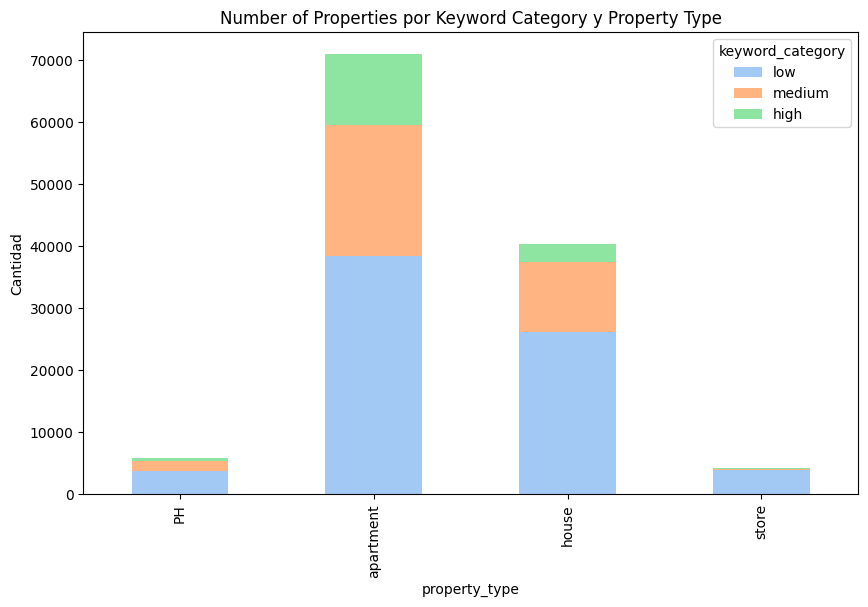

In [81]:
# Plotting the stacked bar chart
count_properties.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('property_type')
plt.ylabel('Cantidad')
plt.title('Number of Properties por Keyword Category y Property Type')
plt.legend(title='keyword_category')
plt.show()

In [82]:
porcentaje_final_nulls = data.isnull().sum() / data.shape[0] * 100
porcentaje_final_nulls.round(2)

operation                      0.00
property_type                  0.00
place_name                     0.02
place_with_parent_names        0.00
country_name                   0.00
state_name                     0.00
geonames_id                   15.39
lat-lon                       42.58
lat                           42.58
lon                           42.58
price                         16.86
currency                      16.86
price_aprox_local_currency    16.86
price_aprox_usd               16.86
surface_total_in_m2           20.40
surface_covered_in_m2         16.44
price_usd_per_m2              23.37
price_per_m2                  27.72
floor                         93.62
rooms                         60.99
expenses                      88.22
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                2.57
place_name_clean               0.00
lat_clean                      6.89
lon_clean                   

Graficamos nuevamente las columnas seleccionadas para ver el cambio en la proporción de nulls/no nulls luego de la limpieza. En muchos casos, reemplazamos las columnas originales por sus equivalentes "_clean" para realizar esta comparación.

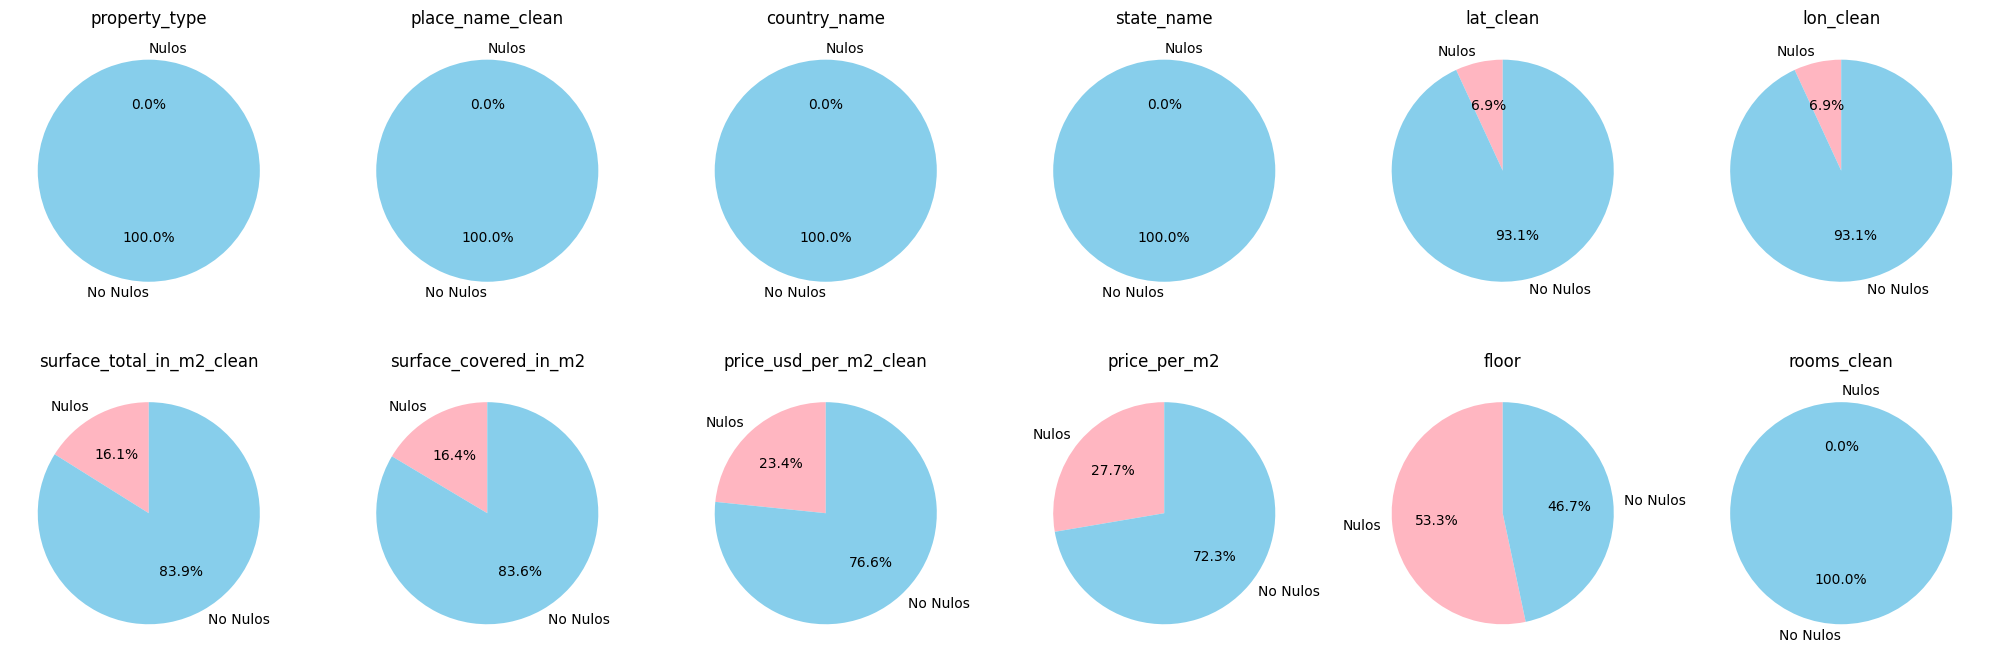

In [83]:
nulos_por_columna2 = {
    'property_type': 0.00,
    'place_name_clean': 0.00,
    'country_name': 0.00,
    'state_name': 0.00,
    'lat_clean': 6.89,
    'lon_clean': 6.89,
    'surface_total_in_m2_clean': 16.10,
    'surface_covered_in_m2': 16.44,
    'price_usd_per_m2_clean': 23.37,
    'price_per_m2': 27.68,
    'floor': 53.32,
    'rooms_clean': 0.00,
}

df_nulos2 = pd.DataFrame.from_dict(nulos_por_columna2, orient='index', columns=['Porcentaje'])

df_nulos2['No Nulos2'] = 100 - df_nulos2['Porcentaje']

palette = ['#FFB6C1', '#87CEEB']

fig, axes = plt.subplots(2, 6, figsize=(20, 7))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for i, (column, data2) in enumerate(df_nulos2.iterrows()):
    ax = axes[i]
    ax.pie(data2, labels=['Nulos', 'No Nulos'], autopct='%1.1f%%', startangle=90, colors=palette)
    ax.set_title(column)

plt.tight_layout()
plt.show()

Guardamos la versión limpia del dataset como un .csv nuevo que será utilizado como input en el análisis geoespacial, y se actualizará automáricamente como parte del proceso de ejecución de esta Notebook.

En esta versión están tanto las columnas originales como las limpias por si en algún momento deseamos volver atrás y trabajar con alguna columna que no hemos trabajado o se nos pide otro tipo de análisis from-to.

In [84]:
data.to_csv('properati_limpio.csv', index=False)

## <u>  Parte 2: Análisis de las variables y su relación

Generamos una nueva versión del dataset limpio con las columnas que utilizaremos en esta parte del análisis de datos.

In [85]:
data_res = data[['property_type', 'state_name', 'place_name_clean', 'surface_total_m2_clean', 'price_usd_per_m2_clean', 'rooms_clean', 'keyword_category']]

data_res = data_res.dropna()

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

columns_to_remove_outliers = ['surface_total_m2_clean', 'price_usd_per_m2_clean', 'rooms_clean']

for column in columns_to_remove_outliers:
    data_res = remove_outliers(data_res, column)

data_res.head()

,property_type,state_name,place_name_clean,surface_total_m2_clean,price_usd_per_m2_clean,rooms_clean,keyword_category
0,PH,Capital Federal,Mataderos,55.0,1127.27,2.0,low
2,apartment,Capital Federal,Mataderos,55.0,1309.09,2.0,low
4,apartment,Buenos Aires Costa Atlántica,Centro,35.0,1828.57,2.0,low
6,PH,Bs.As. G.B.A. Zona Norte,Munro,106.0,1226.42,3.0,low
7,apartment,Capital Federal,Belgrano,45.0,3066.67,1.0,medium


In [86]:
data_res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60010 entries, 0 to 121219
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   property_type           60010 non-null  object  
 1   state_name              60010 non-null  object  
 2   place_name_clean        60010 non-null  object  
 3   surface_total_m2_clean  60010 non-null  float64 
 4   price_usd_per_m2_clean  60010 non-null  float64 
 5   rooms_clean             60010 non-null  float64 
 6   keyword_category        60010 non-null  category
dtypes: category(1), float64(3), object(3)
memory usage: 3.3+ MB


In [87]:
data_res.to_csv('resolucion.csv', index=False)

### 1) Estadística descriptiva y distribución de las variables del dataset limpio

Realizamos la estadística descriptiva de las variables numéricas post-limpieza de acuerdo al tipo de propiedad:

In [88]:
columns_numeric = ['surface_total_m2_clean', 'rooms_clean']

pivot_property_type = data_res.pivot_table(index='property_type', values= columns_numeric, aggfunc='describe')

for column in columns_numeric:
    stats = data_res.groupby('property_type')[column].describe()
    pivot_property_type[column] = stats

pivot_property_type.round(1)

rooms_clean                                         \
                      25%  50%  75%    count  max mean  min  std   
property_type                                                      
PH                    2.0  3.0  4.0   3184.0  7.0  3.1  1.0  1.1   
apartment             2.0  2.0  3.0  41631.0  7.0  2.4  1.0  1.1   
house                 3.0  4.0  4.0  13603.0  7.0  3.7  1.0  1.2   
store                 1.0  1.0  1.0   1592.0  6.0  1.2  1.0  0.7   

              surface_total_m2_clean                                       \
                                 25%    50%    75%    count    max   mean   
property_type                                                               
PH                              62.0   92.5  141.0   3184.0  375.0  110.9   
apartment                       43.0   58.0   85.0  41631.0  375.0   73.4   
house                          150.0  210.0  277.0  13603.0  378.0  212.3   
store                           45.0  100.0  200.0   1592.0  376.0  130.9   

                           
                min   std  
property_type              
PH             16.0  65.8  
apartment      10.0  48.5  
house          10.0  82.5  
store          10.0  97.9

In [89]:
columns_numeric = ['price_usd_per_m2_clean']

pivot_property_type = data_res.pivot_table(index='property_type', values= columns_numeric, aggfunc='describe')

for column in columns_numeric:
    stats = data_res.groupby('property_type')[column].describe()
    pivot_property_type[column] = stats

pivot_property_type.round(1)

price_usd_per_m2_clean                                           \
                                 25%     50%     75%    count     max    mean   
property_type                                                                   
PH                            1000.0  1333.3  1823.9   3184.0  6718.8  1440.5   
apartment                     1675.0  2144.4  2734.4  41631.0  7094.3  2298.8   
house                          833.3  1250.0  1625.0  13603.0  7000.0  1281.1   
store                         1191.9  1857.1  2857.1   1592.0  7083.3  2199.7   

                             
                min     std  
property_type                
PH             49.5   643.9  
apartment      69.2   942.4  
house          19.0   675.2  
store          28.0  1382.2

Creamos una función para eliminar outliers y definimos una paleta de colores que nos mejorará la visualización de los datos separados por tipo de propiedad

In [90]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[column] >= limite_inferior) & (df[column] <= limite_superior)]

In [91]:
palette_ph = "#FF99B3"
palette_apartment = "#80D8FF"
palette_store = "#BF80FF"
palette_house = "#55AA77"

palette_dict = {
    'PH': palette_ph,
    'apartment': palette_apartment,
    'store': palette_store,
    'house': palette_house
}

#### - Análisis del tipo de inmueble (property_type) vs. variables cuantitativas del dataset
Generamos un gráfico para evaluar la frecuencia de los números de habitación por tipo de propiedad - al ser una variable discreta no quedaba bien superponerla con los gráficos para las variables numéricas cuantitativas

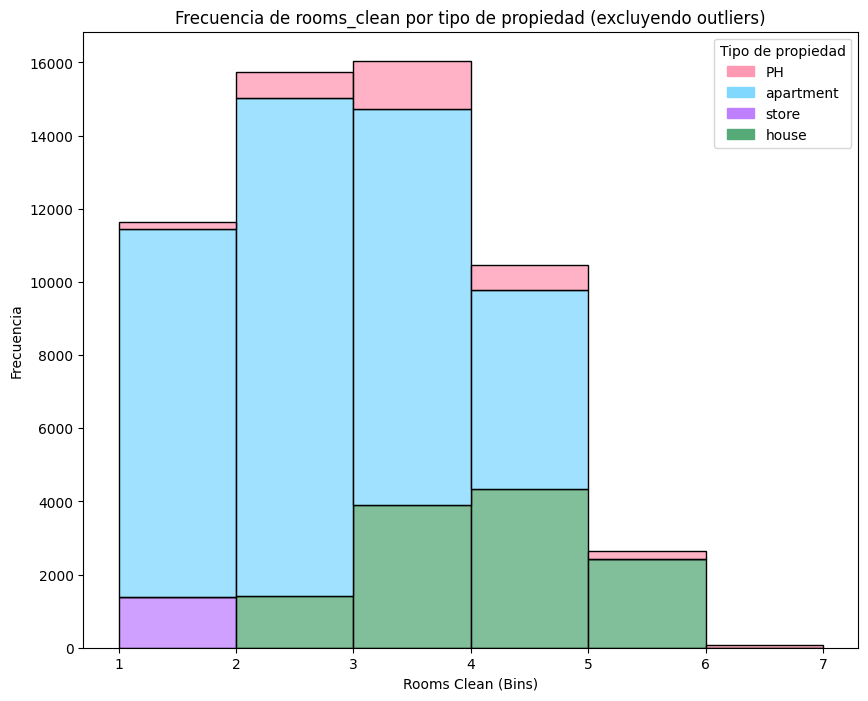

In [92]:
import matplotlib.patches as mpatches

# Eliminar outliers
rooms_no_outliers = {}

for prop_type in data_res['property_type'].unique():
    rooms_no_outliers[prop_type] = remove_outliers(data_res[data_res['property_type'] == prop_type], 'rooms_clean')

# Concatenar los datos filtrados
plt.figure(figsize=(10, 8))
plot_data = pd.concat(rooms_no_outliers.values())
sns.histplot(data=plot_data, x='rooms_clean', hue='property_type', bins=6, multiple='stack', palette=palette_dict)
plt.title('Frecuencia de rooms_clean por tipo de propiedad (excluyendo outliers)')
plt.xlabel('Rooms Clean (Bins)')
plt.ylabel('Frecuencia')

legend_patches = [mpatches.Patch(color=color, label=label) for label, color in palette_dict.items()]
plt.legend(handles=legend_patches, title='Tipo de propiedad')

plt.show()

Definimos las columnas con datos cuantitativos continuos

In [93]:
columnas_de_interes = ['rooms_clean', 'price_usd_per_m2_clean', 'surface_total_m2_clean']
data_res_filtrado = data_res.copy()

for column in columnas_de_interes:
    data_res_filtrado = remove_outliers(data_res_filtrado, column)

columns_numeric_cont = ['surface_total_m2_clean', 'price_usd_per_m2_clean']
property_types = ['PH', 'apartment', 'house', 'store']
data_property_types = {}

for prop_type in property_types:
    filtered_data = data_res_filtrado[data_res_filtrado['property_type'] == prop_type].copy()
    data_property_types[prop_type] = filtered_data[columns_numeric_cont].copy()

In [94]:
# Filter data for 'property_type=apartment'
apartment_data = data_res_filtrado[data_res_filtrado['property_type'] == 'apartment']

# Create a pivot table
pivot_table = pd.pivot_table(apartment_data, values='price_usd_per_m2_clean', index='keyword_category',
                             aggfunc=['mean', 'median', 'std'])

# Rename columns for clarity
pivot_table.columns = ['Average Price per m2', 'Median Price per m2', 'Price per m2 Standard Deviation']

pivot_table

,Average Price per m2,Median Price per m2,Price per m2 Standard Deviation
keyword_category,,,
low,2044.294877,1973.58,678.137896
medium,2252.745672,2197.17,717.908719
high,2424.013620,2386.80,734.295051


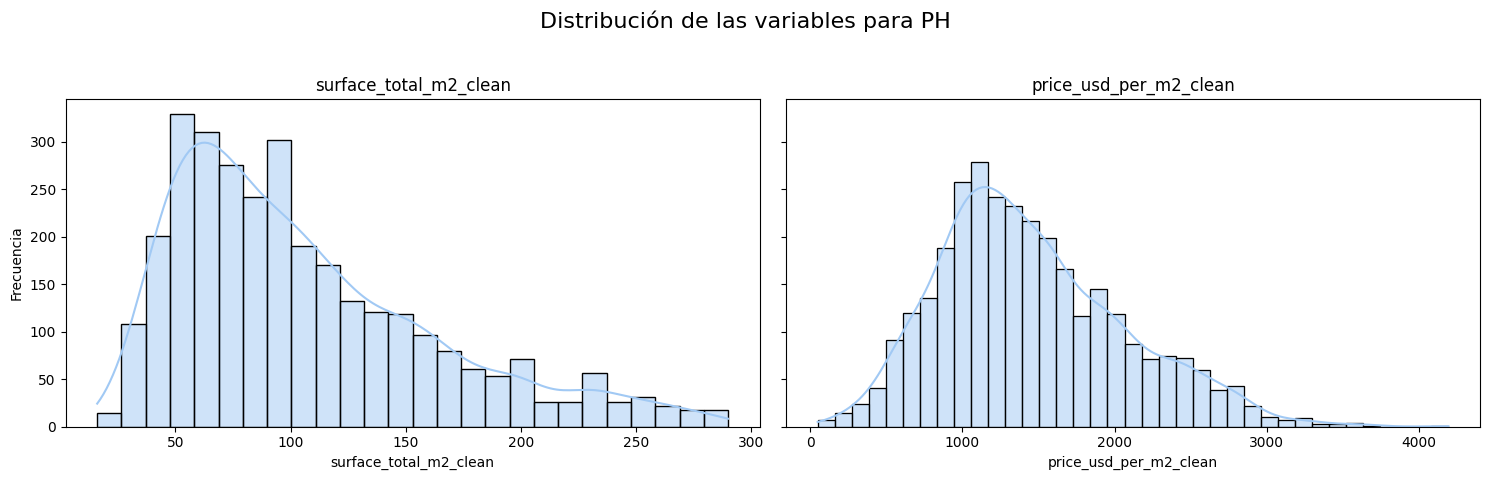

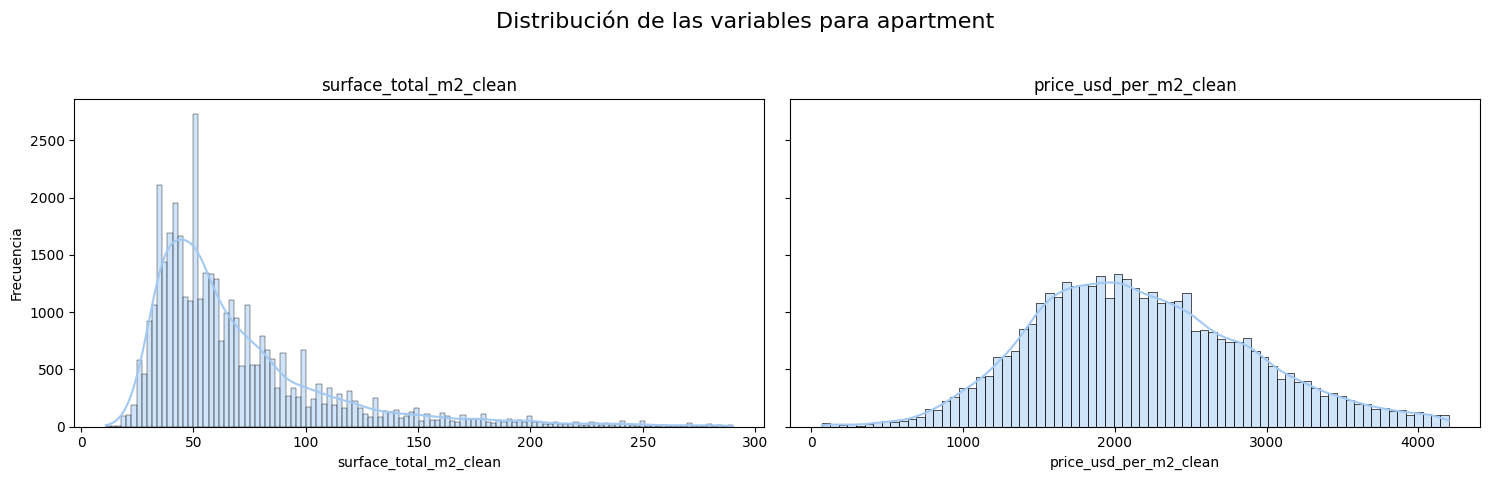

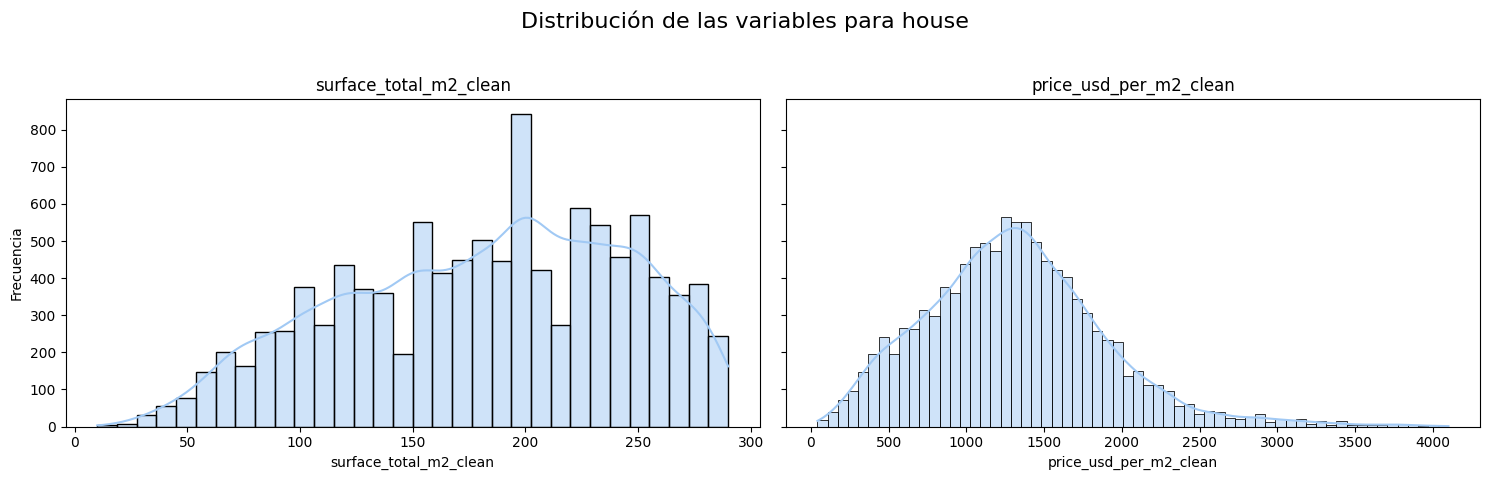

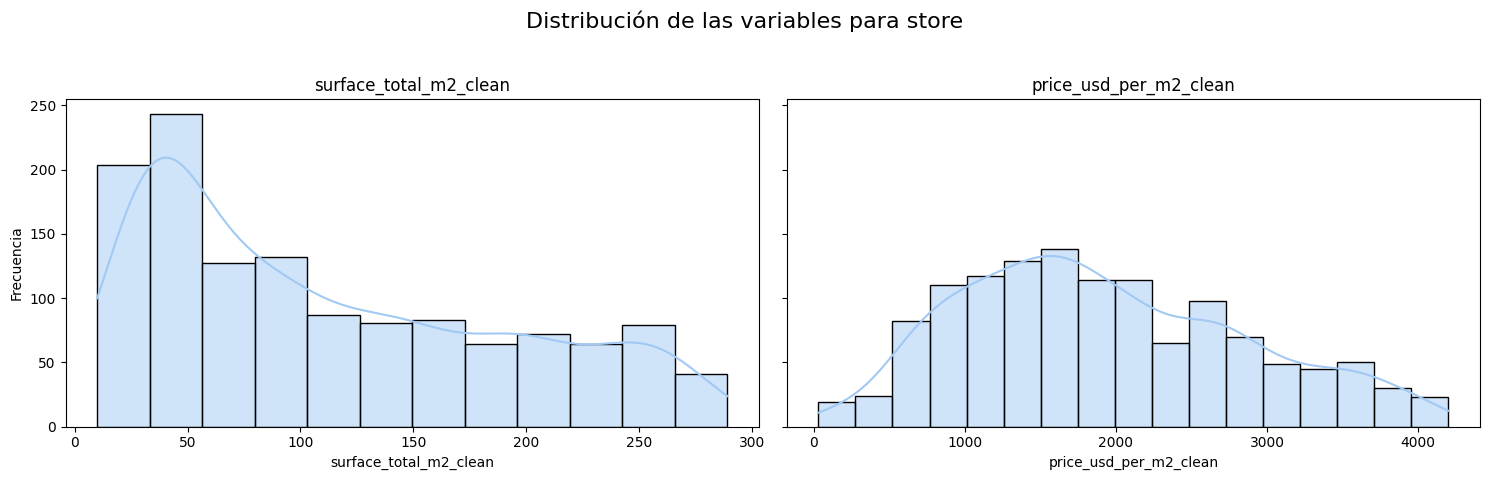

In [95]:
for prop_type, data in data_property_types.items():
    fig, axes = plt.subplots(1, len(columns_numeric_cont), figsize=(15, 5), sharey=True)
    plt.suptitle(f'Distribución de las variables para {prop_type}', fontsize=16)
    
    for i, column in enumerate(columns_numeric_cont):
        ax = axes[i] if len(columns_numeric_cont) > 1 else axes
        sns.histplot(data=data, x=column, ax=ax, kde=True, palette=[palette_dict[prop_type]])
        ax.set_title(f'{column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Generamos un gráfico de violín para ver la distribución de cada una de estas variables por tipo de propiedad (sin outliers)


Text(0, 0.5, 'Precio por Metro Cuadrado')

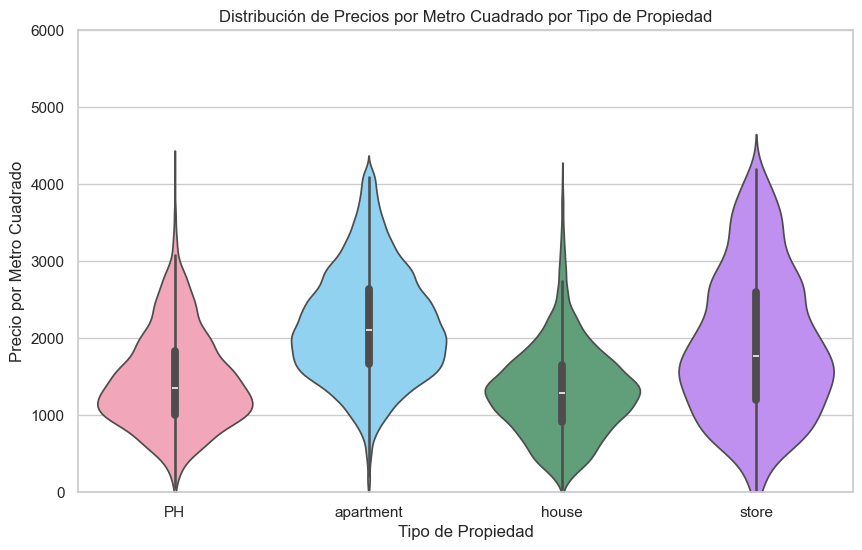

In [96]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='property_type', y='price_usd_per_m2_clean', data=data_res_filtrado, palette=palette_dict)

plt.ylim(0, 6000)

# Título y etiquetas ejes
plt.title('Distribución de Precios por Metro Cuadrado por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio por Metro Cuadrado')

Generamos una última grilla con las distribuciones superpuestas para poder comparar entre los tipos de propiedad

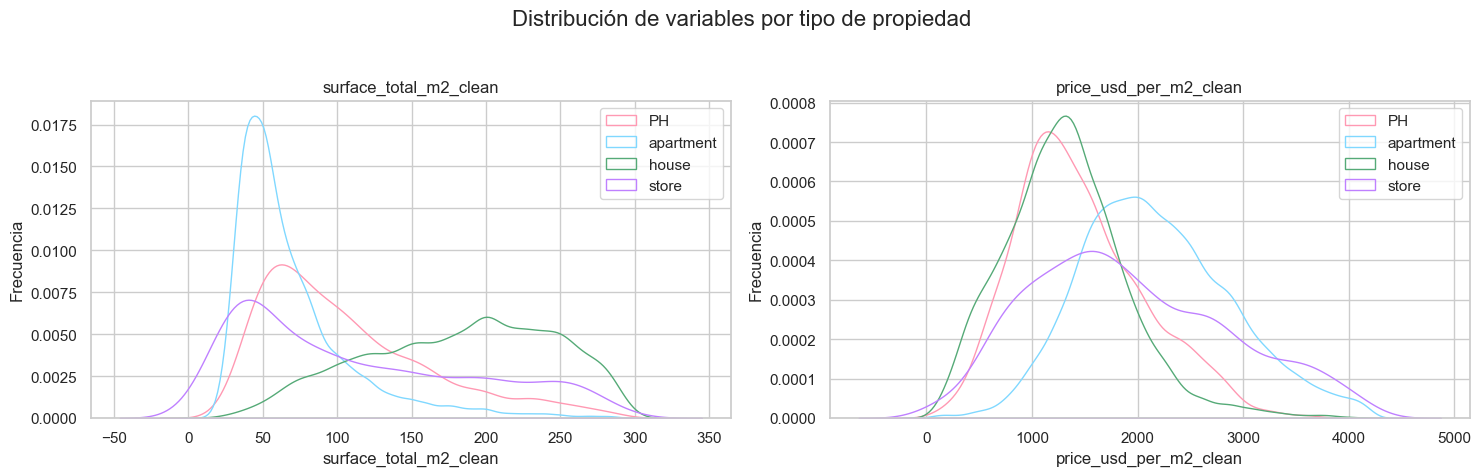

In [97]:
fig, axes = plt.subplots(1, len(columns_numeric_cont), figsize=(15, 5), sharey=False)

for i, column in enumerate(columns_numeric_cont):
    ax = axes[i] if len(columns_numeric_cont) > 1 else axes
    for prop_type, data in data_property_types.items():
        sns.kdeplot(data=data[column], ax=ax, shade=True, color=palette_dict[prop_type], label=prop_type, alpha=0)  # Ajuste de la transparencia
    ax.set_title(f'{column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.legend()
    ax.set_ylim(0, None)

plt.suptitle('Distribución de variables por tipo de propiedad', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<u> Conclusión: Observamos que el tipo de propiedad "casa" es el que tiene a una superficie más variable y mayor al resto, mientras que los departamentos son los que muestran menor variabilidad en la misma (tanto total como cubierta). En cuanto al precio, no se observan grandes diferencias aunque los locales son los que parecieran tener una distribución con una cola a la derecha más marcada (inmuebles de mayor valor).

#### - Observación de las medidas de tendencia central del precio/m2 en referencia a las áreas geográficas

Realizamos un top 5 / bottom 5 de precios por m2 tomando en consideración el AMBA y luego todas las áreas tal como están definidas en el dataset.

A continuación, evaluamos la dispersión de las medianas y las medias para cada provincia o área ("state_name") con respecto a la mediana o la media de Argentina, respectivamente. Esto nos ayudará a extraer conclusiones sobre cuál de estas medidas es más elocuente o representativa, teniendo en cuenta la aparente distribución de los datos que observamos en puntos anteriores (asimétrica).

In [98]:
areas_seleccionadas = ['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste']
data_areas_seleccionadas = data_res[data_res['state_name'].isin(areas_seleccionadas)]

place_prices = data_areas_seleccionadas.groupby(['place_name_clean', 'state_name'])['price_usd_per_m2_clean'].median()

# Top/Bottom 5
top_places = place_prices.nlargest(5)
bottom_places = place_prices.nsmallest(5)

print("Localidades con mayor precio por m2 en el AMBA:")
for (place, area), price in top_places.items():
    print(f"Localidad: {place}, Área: {area}, Precio por m2: {price:.2f}")

print("\n")

print("Localidades con menor precio por m2 en el AMBA:")
for (place, area), price in bottom_places.items():
    print(f"Localidad: {place}, Área: {area}, Precio por m2: {price:.2f}")

Localidades con mayor precio por m2 en el AMBA:
Localidad: Puerto Madero, Área: Capital Federal, Precio por m2: 5607.91
Localidad: Guillermo Hudson, Área: Bs.As. G.B.A. Zona Sur, Precio por m2: 4722.22
Localidad: Palermo Chico, Área: Capital Federal, Precio por m2: 4105.26
Localidad: Bahía del Sol, Área: Bs.As. G.B.A. Zona Norte, Precio por m2: 4000.00
Localidad: Cruce Castelar, Área: Bs.As. G.B.A. Zona Oeste, Precio por m2: 3761.90


Localidades con menor precio por m2 en el AMBA:
Localidad: Virrey del Pino, Área: Bs.As. G.B.A. Zona Oeste, Precio por m2: 140.21
Localidad: Platanos, Área: Bs.As. G.B.A. Zona Sur, Precio por m2: 147.06
Localidad: Gorina, Área: Bs.As. G.B.A. Zona Sur, Precio por m2: 166.67
Localidad: Cuartel V, Área: Bs.As. G.B.A. Zona Oeste, Precio por m2: 224.33
Localidad: González Catán, Área: Bs.As. G.B.A. Zona Oeste, Precio por m2: 243.77


Realizamos un análisis más completo para el conjunto state_name:

In [99]:
place_prices_all = data_res.groupby(['place_name_clean', 'state_name'])['price_usd_per_m2_clean'].median()

# Top/Bottom 5
top_places_all = place_prices_all.nlargest(5)
bottom_places_all = place_prices_all.nsmallest(5)

print("Localidades con mayor precio por m2 en todo el país:")
for (place, area), price in top_places_all.items():
    print(f"Localidad: {place}, Área: {area}, Precio por m2: {price:.2f}")

print("\n")

print("Localidades con menor precio por m2 en todo el país:")
for (place, area), price in bottom_places_all.items():
    print(f"Localidad: {place}, Área: {area}, Precio por m2: {price:.2f}")

Localidades con mayor precio por m2 en todo el país:
Localidad: Monte Cristo, Área: Córdoba, Precio por m2: 6400.00
Localidad: Villa Nueva, Área: Mendoza, Precio por m2: 6276.15
Localidad: Puerto Madero, Área: Capital Federal, Precio por m2: 5607.91
Localidad: Despeñaderos, Área: Córdoba, Precio por m2: 5020.70
Localidad: Guillermo Hudson, Área: Bs.As. G.B.A. Zona Sur, Precio por m2: 4722.22


Localidades con menor precio por m2 en todo el país:
Localidad: Naposta, Área: Buenos Aires Interior, Precio por m2: 82.78
Localidad: Barrio Alto Camet, Área: Buenos Aires Costa Atlántica, Precio por m2: 87.10
Localidad: Villars, Área: Buenos Aires Interior, Precio por m2: 97.22
Localidad: Garupá, Área: Misiones, Precio por m2: 102.82
Localidad: Villa Mercedes, Área: San Juan, Precio por m2: 105.00


In [100]:
filtered_data = data_res[data_res['property_type'] == 'house']

pivot_median_price = filtered_data.pivot_table(values='price_usd_per_m2_clean', index='state_name', aggfunc='median')

overall_mean = filtered_data['price_usd_per_m2_clean'].mean()
pivot_median_price['Dispersion_to_Mean'] = (pivot_median_price['price_usd_per_m2_clean'] - overall_mean) / overall_mean
pivot_median_price['Standard_Deviation'] = filtered_data.groupby('state_name')['price_usd_per_m2_clean'].std()
pivot_median_price['Coefficient_of_Variation'] = pivot_median_price['Standard_Deviation'] / pivot_median_price['price_usd_per_m2_clean']

pivot_median_price

,price_usd_per_m2_clean,Dispersion_to_Mean,Standard_Deviation,Coefficient_of_Variation
state_name,,,,
Bs.As. G.B.A. Zona Norte,1428.570,0.115145,588.918808,0.412244
Bs.As. G.B.A. Zona Oeste,980.390,-0.234705,687.475145,0.701226
Bs.As. G.B.A. Zona Sur,1250.000,-0.024247,652.222757,0.521778
Buenos Aires Costa Atlántica,942.210,-0.264509,548.115483,0.581734
Buenos Aires Interior,806.585,-0.370378,537.669372,0.666600
Capital Federal,1494.375,0.166513,723.629620,0.484236
Catamarca,500.355,-0.609422,638.113120,1.275321
Chaco,810.810,-0.367080,275.648671,0.339967
Chubut,1400.000,0.092843,1024.226546,0.731590


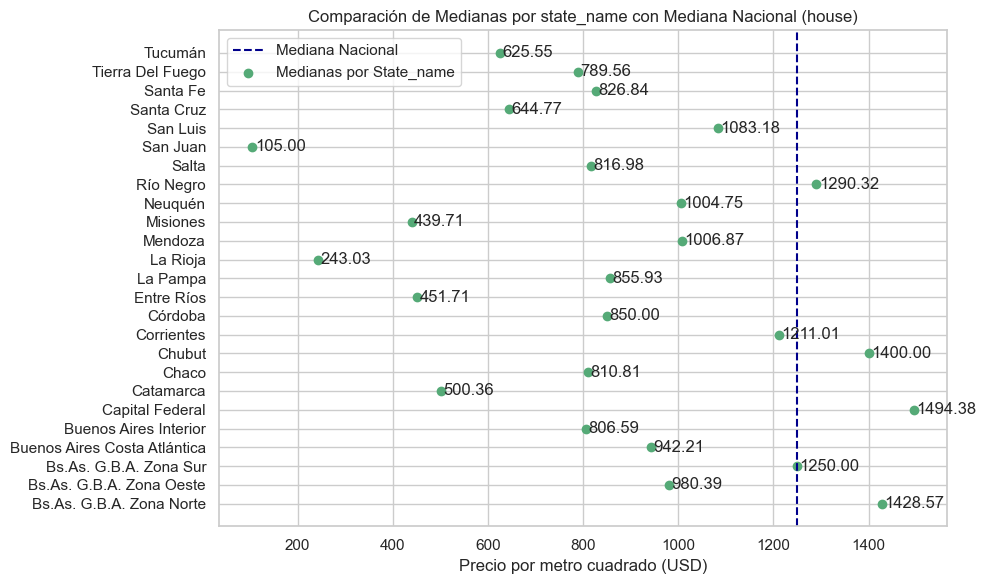

In [101]:
filtered_data = data_res[data_res['property_type'] == 'house']
overall_median = filtered_data['price_usd_per_m2_clean'].median()
median_by_state = filtered_data.groupby('state_name')['price_usd_per_m2_clean'].median().reset_index()

plt.figure(figsize=(10, 6))

plt.axvline(x=overall_median, color='#00008B', linestyle='--', label='Mediana Nacional')

plt.scatter(median_by_state['price_usd_per_m2_clean'], median_by_state['state_name'], color='#55AA77', label='Medianas por State_name')
for i, state in enumerate(median_by_state['state_name']):
    plt.text(median_by_state['price_usd_per_m2_clean'][i] + 5, state, f'{median_by_state["price_usd_per_m2_clean"][i]:.2f}', va='center')

plt.xlabel('Precio por metro cuadrado (USD)')
plt.title('Comparación de Medianas por state_name con Mediana Nacional (house)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

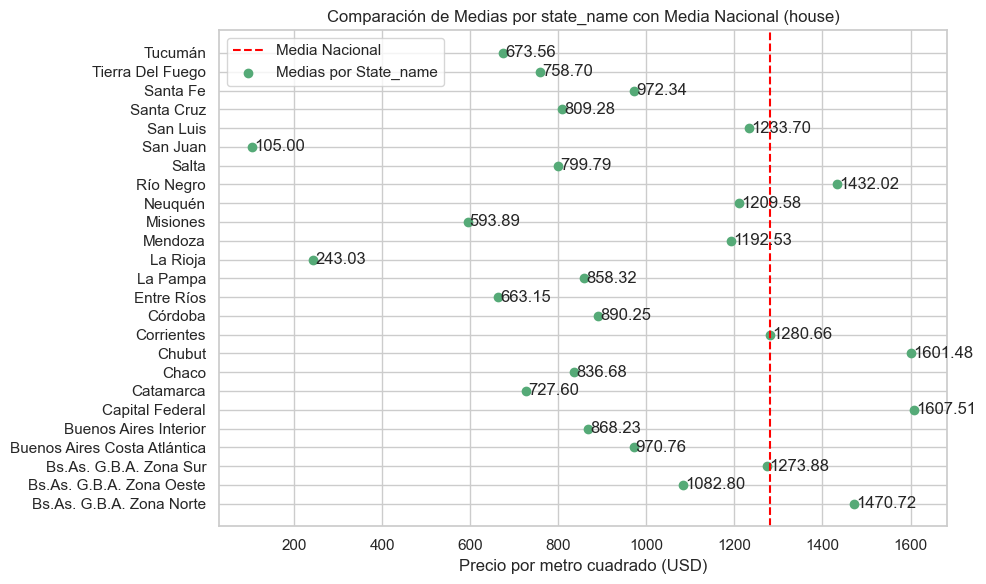

In [102]:
filtered_data = data_res[data_res['property_type'] == 'house']
overall_mean = filtered_data['price_usd_per_m2_clean'].mean()
mean_by_state = filtered_data.groupby('state_name')['price_usd_per_m2_clean'].mean().reset_index()

plt.figure(figsize=(10, 6))

plt.axvline(x=overall_mean, color='#FF0000', linestyle='--', label='Media Nacional')

plt.scatter(mean_by_state['price_usd_per_m2_clean'], mean_by_state['state_name'], color='#55AA77', label='Medias por State_name')
for i, state in enumerate(mean_by_state['state_name']):
    plt.text(mean_by_state['price_usd_per_m2_clean'][i] + 5, state, f'{mean_by_state["price_usd_per_m2_clean"][i]:.2f}', va='center')

plt.xlabel('Precio por metro cuadrado (USD)')
plt.title('Comparación de Medias por state_name con Media Nacional (house)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


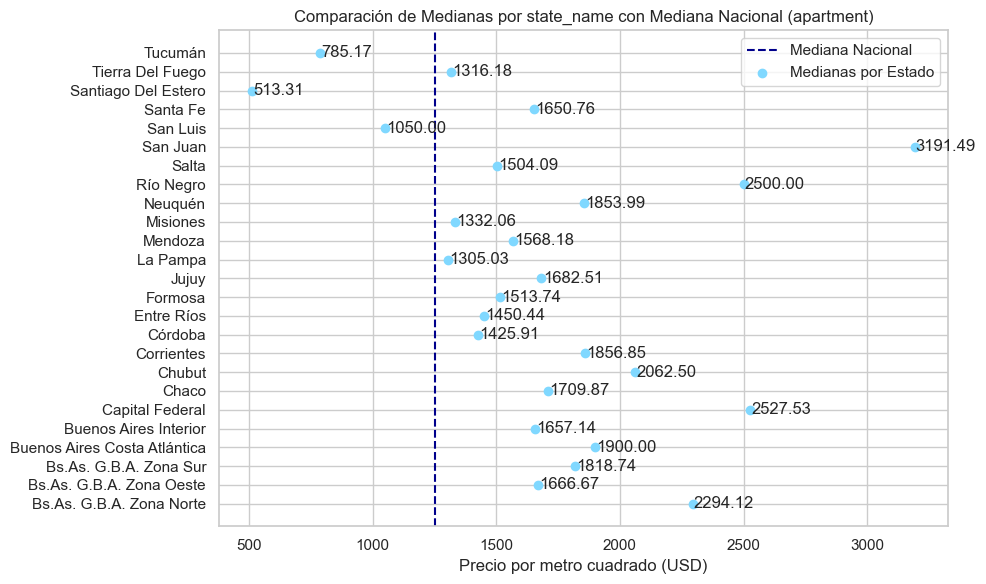

In [103]:
filtered_data = data_res[data_res['property_type'] == 'apartment']

median_by_state = filtered_data.groupby('state_name')['price_usd_per_m2_clean'].median().reset_index()

plt.figure(figsize=(10, 6))
plt.axvline(x=overall_median, color='#00008B', linestyle='--', label='Mediana Nacional')

plt.scatter(median_by_state['price_usd_per_m2_clean'], median_by_state['state_name'], color='#80D8FF', label='Medianas por Estado')
for i, state in enumerate(median_by_state['state_name']):
    plt.text(median_by_state['price_usd_per_m2_clean'][i] + 5, state, f'{median_by_state["price_usd_per_m2_clean"][i]:.2f}', va='center')

plt.xlabel('Precio por metro cuadrado (USD)')
plt.title('Comparación de Medianas por state_name con Mediana Nacional (apartment)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

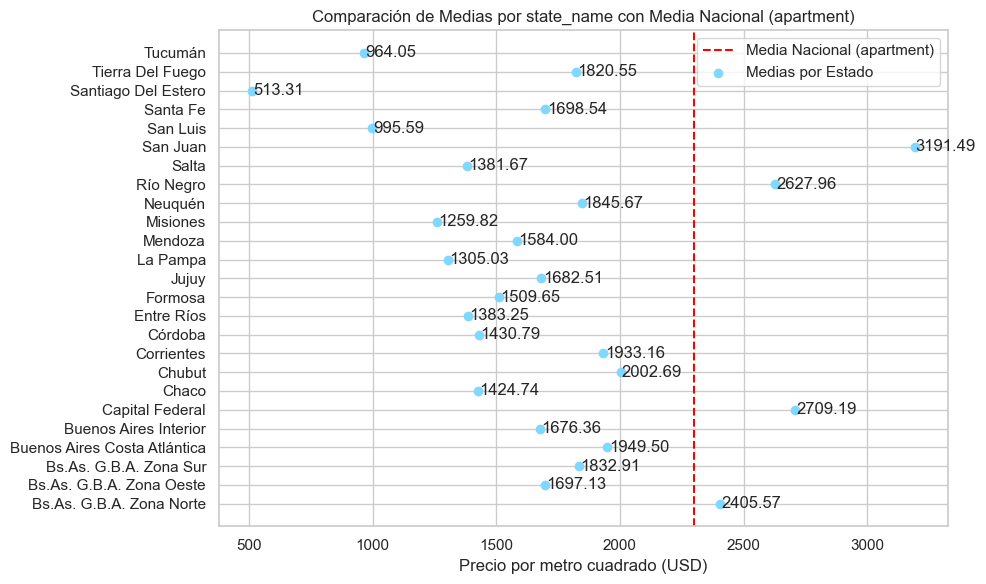

In [104]:
filtered_data = data_res[data_res['property_type'] == 'apartment']

overall_mean = filtered_data['price_usd_per_m2_clean'].mean()
mean_by_state = filtered_data.groupby('state_name')['price_usd_per_m2_clean'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.axvline(x=overall_mean, color='#FF0000', linestyle='--', label='Media Nacional (apartment)')  # Media Nacional en rojo

plt.scatter(mean_by_state['price_usd_per_m2_clean'], mean_by_state['state_name'], color='#80D8FF', label='Medias por Estado')
for i, state in enumerate(mean_by_state['state_name']):
    plt.text(mean_by_state['price_usd_per_m2_clean'][i] + 5, state, f'{mean_by_state["price_usd_per_m2_clean"][i]:.2f}', va='center')

plt.xlabel('Precio por metro cuadrado (USD)')
plt.title('Comparación de Medias por state_name con Media Nacional (apartment)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


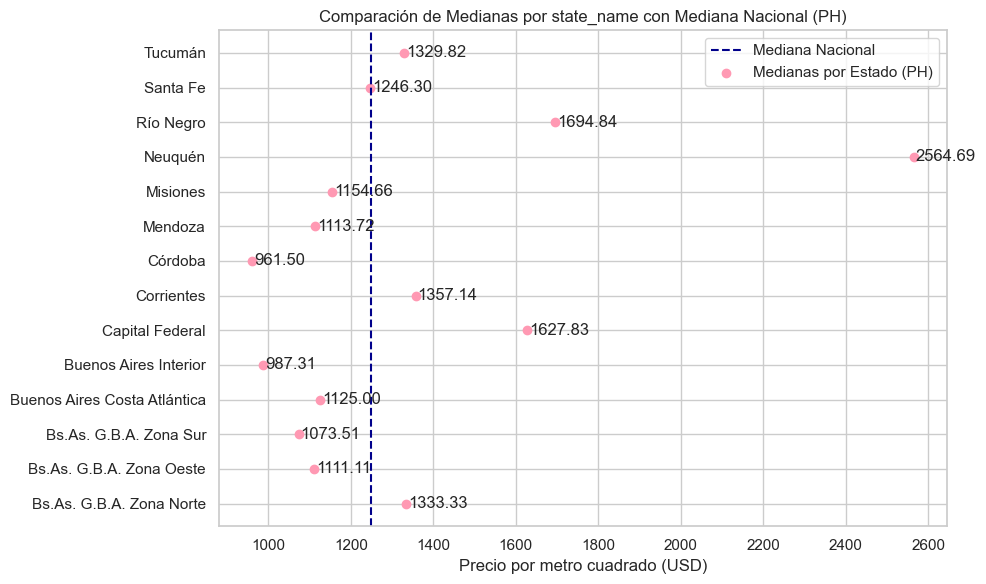

In [105]:
filtered_data = data_res[data_res['property_type'] == 'PH']

median_by_state = filtered_data.groupby('state_name')['price_usd_per_m2_clean'].median().reset_index()

plt.figure(figsize=(10, 6))
plt.axvline(x=overall_median, color='#00008B', linestyle='--', label='Mediana Nacional')

plt.scatter(median_by_state['price_usd_per_m2_clean'], median_by_state['state_name'], color='#FF99B3', label='Medianas por Estado (PH)')
for i, state in enumerate(median_by_state['state_name']):
    plt.text(median_by_state['price_usd_per_m2_clean'][i] + 5, state, f'{median_by_state["price_usd_per_m2_clean"][i]:.2f}', va='center')

plt.xlabel('Precio por metro cuadrado (USD)')
plt.title('Comparación de Medianas por state_name con Mediana Nacional (PH)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

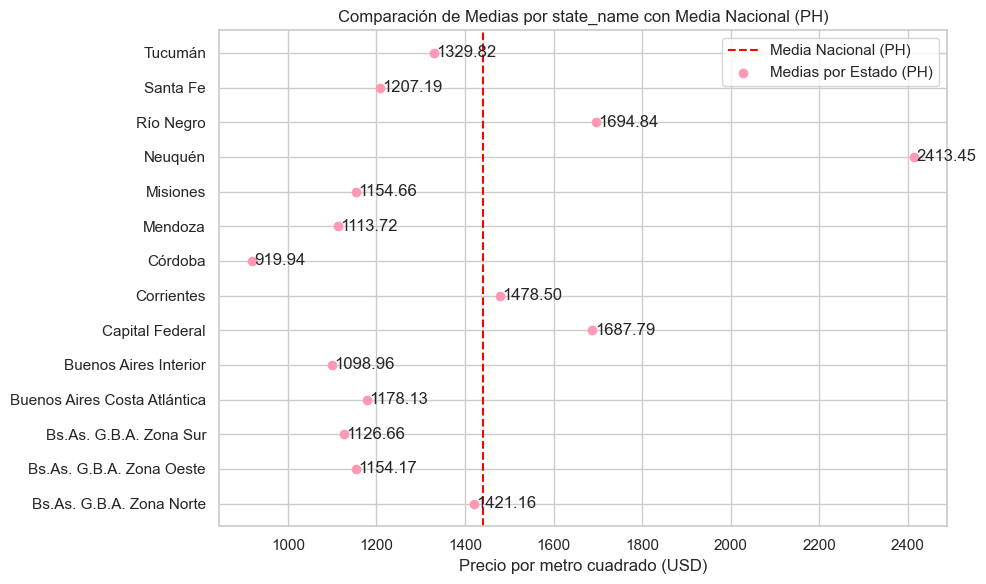

In [106]:
filtered_data = data_res[data_res['property_type'] == 'PH']

overall_mean = filtered_data['price_usd_per_m2_clean'].mean()
mean_by_state = filtered_data.groupby('state_name')['price_usd_per_m2_clean'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.axvline(x=overall_mean, color='#FF0000', linestyle='--', label='Media Nacional (PH)')  # Línea de media nacional en rojo

plt.scatter(mean_by_state['price_usd_per_m2_clean'], mean_by_state['state_name'], color='#FF99B3', label='Medias por Estado (PH)')
for i, state in enumerate(mean_by_state['state_name']):
    plt.text(mean_by_state['price_usd_per_m2_clean'][i] + 5, state, f'{mean_by_state["price_usd_per_m2_clean"][i]:.2f}', va='center')

plt.xlabel('Precio por metro cuadrado (USD)')
plt.title('Comparación de Medias por state_name con Media Nacional (PH)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



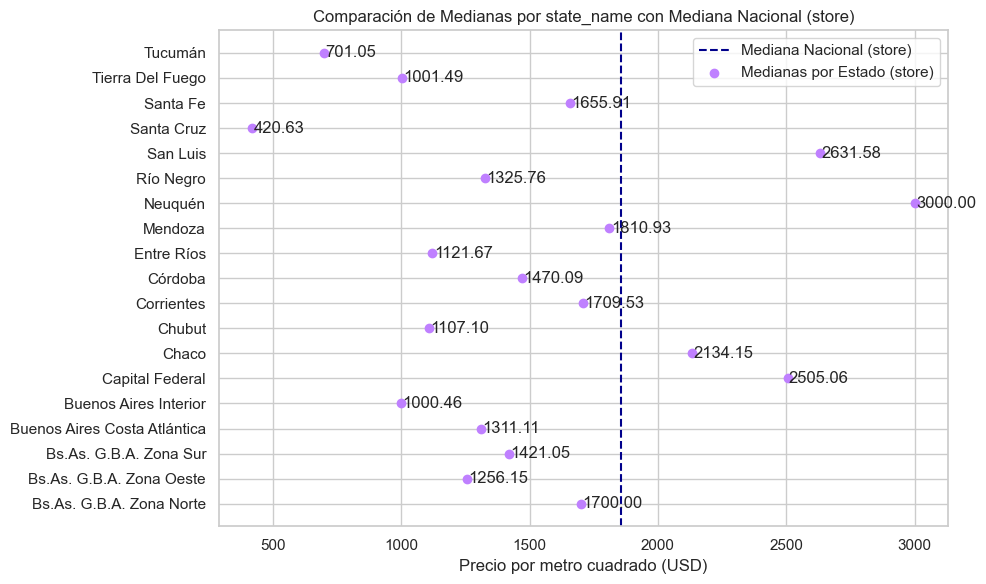

In [107]:
filtered_data = data_res[data_res['property_type'] == 'store']

overall_median_store = filtered_data['price_usd_per_m2_clean'].median()
median_by_state_store = filtered_data.groupby('state_name')['price_usd_per_m2_clean'].median().reset_index()

plt.figure(figsize=(10, 6))
plt.axvline(x=overall_median_store, color='#00008B', linestyle='--', label='Mediana Nacional (store)')

plt.scatter(median_by_state_store['price_usd_per_m2_clean'], median_by_state_store['state_name'], color='#BF80FF', label='Medianas por Estado (store)')
for i, state in enumerate(median_by_state_store['state_name']):
    plt.text(median_by_state_store['price_usd_per_m2_clean'][i] + 5, state, f'{median_by_state_store["price_usd_per_m2_clean"][i]:.2f}', va='center')

plt.xlabel('Precio por metro cuadrado (USD)')
plt.title('Comparación de Medianas por state_name con Mediana Nacional (store)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

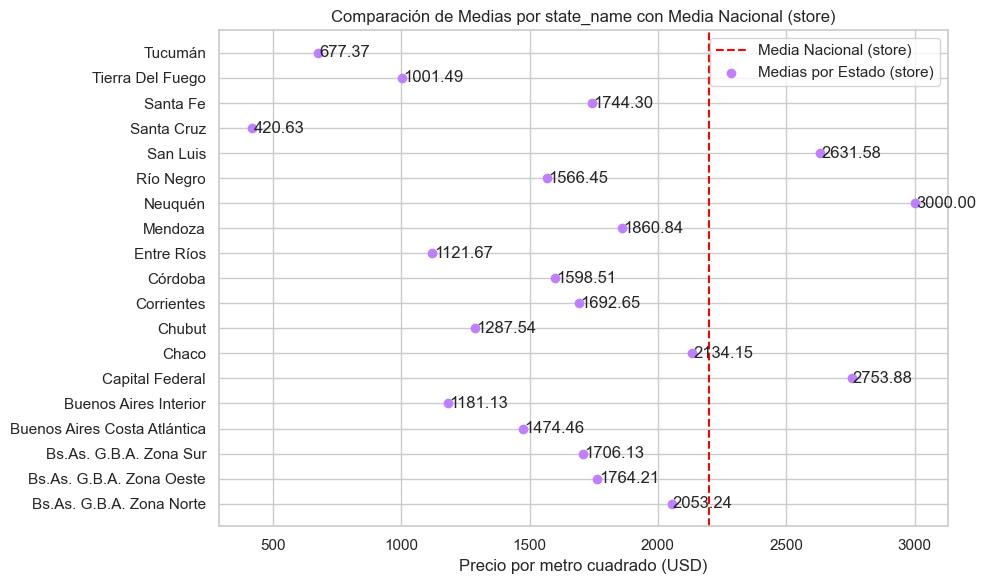

In [108]:
filtered_data = data_res[data_res['property_type'] == 'store']

overall_mean_store = filtered_data['price_usd_per_m2_clean'].mean()
mean_by_state_store = filtered_data.groupby('state_name')['price_usd_per_m2_clean'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.axvline(x=overall_mean_store, color='#FF0000', linestyle='--', label='Media Nacional (store)')  # Línea de media nacional en rojo

plt.scatter(mean_by_state_store['price_usd_per_m2_clean'], mean_by_state_store['state_name'], color='#BF80FF', label='Medias por Estado (store)')
for i, state in enumerate(mean_by_state_store['state_name']):
    plt.text(mean_by_state_store['price_usd_per_m2_clean'][i] + 5, state, f'{mean_by_state_store["price_usd_per_m2_clean"][i]:.2f}', va='center')

plt.xlabel('Precio por metro cuadrado (USD)')
plt.title('Comparación de Medias por state_name con Media Nacional (store)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<u> Conclusión: Al observar los datos, vemos que las medianas de los estados (state_name) son mucho más compactas y por ende es una medida de tendencia central más adecuada para describir a la muestra de todos los tipos de propiedades (property_type). La única excepción sería en los locales 'store' por la baja cantidad de publicaciones, y el fuerte desbalance entre provincias, lo cual hace que la mediana nacional se vea fuertemente influenciada por los valores de las provincias más mayoritarias y CABA. 

La media, al verse influenciada por valores extremos, y teniendo en cuenta la distribución asimétrica observada para los datos, no consiste en una medida de tendencia central informativa en los casos estudiados.

### 2) Tablas de correlación

a) Matriz de correlaciones entre variables cuantitativas (correlaciones por rangos de Spearman)

In [109]:
spearman_cuantitativas = data_res_filtrado[columnas_de_interes].corr(method='spearman')
print("Matriz de correlaciones de Spearman para variables cuantitativas (sin outliers):")
spearman_cuantitativas

Matriz de correlaciones de Spearman para variables cuantitativas (sin outliers):


,rooms_clean,price_usd_per_m2_clean,surface_total_m2_clean
rooms_clean,1.000000,-0.183367,0.636949
price_usd_per_m2_clean,-0.183367,1.000000,-0.322064
surface_total_m2_clean,0.636949,-0.322064,1.000000


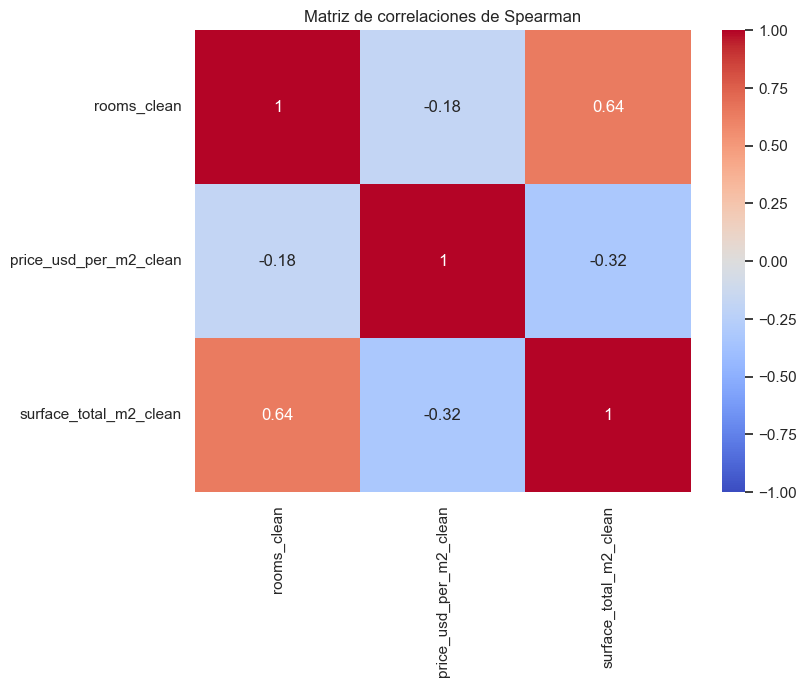

In [110]:
# Configurar la paleta de colores para el mapa de calor
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Mostrar el mapa de calor con los valores de correlación de Spearman
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_cuantitativas, annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Matriz de correlaciones de Spearman')
plt.show()

<u> Conclusiones:
- El valor R de correlación entre surface_covered_in_m2 durante y surface_total_m2_clean es alto y positivo (.94), lo cual es esperable ya que tomamos datos de la columna surface_covered_in_m2 durante la limpieza de nulls de surface_total_m2_clean. 
- Se observa una correlación moderada positiva (.64) entre rooms_clean y surface_total_m2_clean (también con surface_covered_in_m2, .66), también razonable porque esperamos que propiedades con mayor número de ambientes tiendan a ser más grandes en superficie (al menos en aquellos tipos de propiedades que exhibieron una media mayor en número de ambientes como "house").
- Se observa una correlación negativa, leve a moderada, entre surface_total_m2_clean y price_usd_per_m2_clean (-.33) lo cual significaría que, en tendencia, los inmuebles con mayor superficie tienen un m2 más barato o se encuentran en zonas con m2 más baratos (variable de confusión, externa no considerada en esta correlación entre dos únicas variables). Lamentablemente no se encuentran correlaciones fuertes al considerar el precio por m2 que es el objetivo principal de esta sección.
Al utilizarse un modelo no paramétrico no podemos hipotetizar sobre causalidad.

En adelante, realizaremos tablas de correlación entre precio por m2 y state_ name

Se realizan tablas de correlación entre 'price_usd_per_m2_clean' y 'state_name' == Argentina, AMBA, CABA, Córdoba o Santa Fe. También se repite el análisis filtrando a través de máscaras por 'property_type'.


b) Matriz de correlaciones entre precio por m2 y state_name ALL (Argentina)

In [111]:
data_res_clean = remove_outliers(data_res, 'price_usd_per_m2_clean')

# Convertir 'state_name' en variables dummy (one-hot encoding)
df_encoded = pd.get_dummies(data_res_clean['state_name'], prefix='state')

# Agregar 'price_usd_per_m2_clean' al DataFrame de variables dummy
df_encoded['price_usd_per_m2_clean'] = data_res_clean['price_usd_per_m2_clean']

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Mostrar la matriz de correlación
correlation_state_price = correlation_matrix['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_state_price

price_usd_per_m2_clean                1.000000
state_Capital Federal                 0.444587
state_Neuquén                         0.001781
state_Bs.As. G.B.A. Zona Norte       -0.001129
state_Jujuy                          -0.001181
state_San Juan                       -0.001920
state_Río Negro                      -0.005840
state_Santiago Del Estero            -0.007228
state_La Rioja                       -0.008626
state_Formosa                        -0.011175
state_Catamarca                      -0.012240
state_La Pampa                       -0.013764
state_Santa Cruz                     -0.017763
state_Chaco                          -0.019351
state_Tierra Del Fuego               -0.019371
state_Chubut                         -0.020810
state_Salta                          -0.024514
state_Corrientes                     -0.027659
state_Entre Ríos                     -0.037646
state_San Luis                       -0.040459
state_Mendoza                        -0.041867
state_Misione

In [112]:
# Filtrar por property_type == 'house'
data_res_clean_filtered_house = data_res_clean[data_res_clean['property_type'] == 'house']

# Convertir 'state_name' en variables dummy (one-hot encoding)
df_encoded_filtered_house = pd.get_dummies(data_res_clean_filtered_house['state_name'], prefix='state')

# Agregar 'price_usd_per_m2_clean' al DataFrame de variables dummy
df_encoded_filtered_house['price_usd_per_m2_clean'] = data_res_clean_filtered_house['price_usd_per_m2_clean']

# Calcular la matriz de correlación
correlation_matrix_filtered_house = df_encoded_filtered_house.corr()

# Mostrar la matriz de correlación
correlation_state_price_filtered_house = correlation_matrix_filtered_house['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_state_price_filtered_house


price_usd_per_m2_clean                1.000000
state_Bs.As. G.B.A. Zona Norte        0.280697
state_Capital Federal                 0.126309
state_Chubut                          0.025852
state_Río Negro                       0.016910
state_Corrientes                      0.002998
state_Neuquén                        -0.004237
state_Bs.As. G.B.A. Zona Sur         -0.006924
state_La Pampa                       -0.013863
state_La Rioja                       -0.014299
state_Catamarca                      -0.014990
state_San Juan                       -0.016237
state_Santa Cruz                     -0.017957
state_Chaco                          -0.021507
state_Salta                          -0.024258
state_San Luis                       -0.025749
state_Mendoza                        -0.026579
state_Tierra Del Fuego               -0.027347
state_Entre Ríos                     -0.048306
state_Tucumán                        -0.050267
state_Misiones                       -0.089756
state_Buenos 

In [113]:
data_res_clean_filtered = data_res_clean[data_res_clean['property_type'] == 'apartment']

# Convertir 'state_name' en variables dummy (one-hot encoding)
df_encoded_filtered = pd.get_dummies(data_res_clean_filtered['state_name'], prefix='state')

# Agregar 'price_usd_per_m2_clean' al DataFrame de variables dummy
df_encoded_filtered['price_usd_per_m2_clean'] = data_res_clean_filtered['price_usd_per_m2_clean']

# Calcular la matriz de correlación
correlation_matrix_filtered = df_encoded_filtered.corr()

# Mostrar la matriz de correlación
correlation_state_price_filtered = correlation_matrix_filtered['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_state_price_filtered

price_usd_per_m2_clean                1.000000
state_Capital Federal                 0.396641
state_Bs.As. G.B.A. Zona Norte        0.095119
state_Río Negro                       0.018264
state_San Juan                        0.007097
state_Jujuy                          -0.003402
state_Chubut                         -0.004841
state_Tierra Del Fuego               -0.007720
state_La Pampa                       -0.008525
state_Santiago Del Estero            -0.011536
state_Chaco                          -0.013746
state_Corrientes                     -0.018109
state_Neuquén                        -0.021999
state_San Luis                       -0.024545
state_Formosa                        -0.024803
state_Salta                          -0.030106
state_Entre Ríos                     -0.032456
state_Misiones                       -0.051568
state_Mendoza                        -0.053242
state_Buenos Aires Interior          -0.061499
state_Tucumán                        -0.093307
state_Buenos 

In [114]:
# Filtrar por property_type == 'PH'
data_res_clean_filtered_house = data_res_clean[data_res_clean['property_type'] == 'PH']

# Convertir 'state_name' en variables dummy (one-hot encoding)
df_encoded_filtered_house = pd.get_dummies(data_res_clean_filtered_house['state_name'], prefix='state')

# Agregar 'price_usd_per_m2_clean' al DataFrame de variables dummy
df_encoded_filtered_house['price_usd_per_m2_clean'] = data_res_clean_filtered_house['price_usd_per_m2_clean']

# Calcular la matriz de correlación
correlation_matrix_filtered_house = df_encoded_filtered_house.corr()

# Mostrar la matriz de correlación
correlation_state_price_filtered_house = correlation_matrix_filtered_house['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_state_price_filtered_house


price_usd_per_m2_clean                1.000000
state_Capital Federal                 0.326410
state_Neuquén                         0.232226
state_Río Negro                       0.010606
state_Corrientes                      0.007755
state_Tucumán                        -0.002954
state_Misiones                       -0.007969
state_Mendoza                        -0.012930
state_Bs.As. G.B.A. Zona Norte       -0.018330
state_Santa Fe                       -0.023354
state_Buenos Aires Interior          -0.042899
state_Córdoba                        -0.104683
state_Buenos Aires Costa Atlántica   -0.159185
state_Bs.As. G.B.A. Zona Sur         -0.164267
state_Bs.As. G.B.A. Zona Oeste       -0.194966
Name: price_usd_per_m2_clean, dtype: float64

In [115]:
# Filtrar por property_type == 'store'
data_res_clean_filtered_house = data_res_clean[data_res_clean['property_type'] == 'store']

# Convertir 'state_name' en variables dummy (one-hot encoding)
df_encoded_filtered_house = pd.get_dummies(data_res_clean_filtered_house['state_name'], prefix='state')

# Agregar 'price_usd_per_m2_clean' al DataFrame de variables dummy
df_encoded_filtered_house['price_usd_per_m2_clean'] = data_res_clean_filtered_house['price_usd_per_m2_clean']

# Calcular la matriz de correlación
correlation_matrix_filtered_house = df_encoded_filtered_house.corr()

# Mostrar la matriz de correlación
correlation_state_price_filtered_house = correlation_matrix_filtered_house['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_state_price_filtered_house


price_usd_per_m2_clean                1.000000
state_Capital Federal                 0.345349
state_Neuquén                         0.032001
state_San Luis                        0.021708
state_Chaco                           0.007810
state_Mendoza                         0.000426
state_Corrientes                     -0.009061
state_Bs.As. G.B.A. Zona Norte       -0.013313
state_Entre Ríos                     -0.020478
state_Tierra Del Fuego               -0.023836
state_Santa Fe                       -0.034979
state_Santa Cruz                     -0.040065
state_Chubut                         -0.059555
state_Río Negro                      -0.061777
state_Córdoba                        -0.084143
state_Tucumán                        -0.087207
state_Buenos Aires Interior          -0.092936
state_Bs.As. G.B.A. Zona Oeste       -0.110578
state_Bs.As. G.B.A. Zona Sur         -0.127033
state_Buenos Aires Costa Atlántica   -0.137391
Name: price_usd_per_m2_clean, dtype: float64

<u> Conclusión: CABA exhibe un coeficiente R de .44, es decir, una moderada correlación positiva con el precio por m2 en USD cuando se toman todos los tipos de propiedades en conjunto. Tomados por separado, las correlaciones son moderadas en los inmuebles apartment, PH y store. Esto podría interpretarse como que existe una relación estadística positiva (alto-alto, bajo-bajo) entre estar ubicado en CABA y el precio por metro cuadrado de las propiedades. Sin embargo, el valor no es extremadamente alto, lo que sugiere que otros factores también podrían influir en el precio.

Por lo demás, no se extraen conclusiones de valor, ya que los valores -0.3 > R < 0.3 son considerados correlaciones débiles y suelen asociarse a p-values no significativos.

c) Matriz de correlaciones entre precio por m2 y localidades dentro de CABA

In [116]:
conditions_capital = ['Capital Federal']

mask_capital = data_res_clean[data_res_clean['state_name'].isin(conditions_capital)]

# Eliminar outliers en 'price_usd_per_m2_clean' para 'place_name_clean' de Capital Federal
mask_capital = remove_outliers(mask_capital, 'price_usd_per_m2_clean')

# Convertir 'place_name_clean' en variables dummy (one-hot encoding)
df_encoded_capital = pd.get_dummies(mask_capital['place_name_clean'], prefix='place')

# Agregar 'price_usd_per_m2_clean' al DataFrame de variables dummy
df_encoded_capital['price_usd_per_m2_clean'] = mask_capital['price_usd_per_m2_clean']

# Calcular la matriz de correlación
correlation_matrix_capital = df_encoded_capital.corr()

# Mostrar la matriz de correlación
correlation_place_price_capital = correlation_matrix_capital['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_capital

price_usd_per_m2_clean     1.000000
place_Belgrano             0.229543
place_Palermo              0.211842
place_Recoleta             0.191761
place_Palermo Hollywood    0.111581
                             ...   
place_Floresta            -0.108684
place_Boedo               -0.117793
place_Flores              -0.125964
place_Villa Lugano        -0.128280
place_Mataderos           -0.143314
Name: price_usd_per_m2_clean, Length: 63, dtype: float64

In [117]:
# Filtrar por 'property_type' == 'house'
mask_capital_house = mask_capital[mask_capital['property_type'] == 'house']
df_encoded_capital_house = pd.get_dummies(mask_capital_house['place_name_clean'], prefix='place')
df_encoded_capital_house['price_usd_per_m2_clean'] = mask_capital_house['price_usd_per_m2_clean']
correlation_matrix_capital_house = df_encoded_capital_house.corr()
correlation_place_price_capital_house = correlation_matrix_capital_house['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_capital_house


price_usd_per_m2_clean       1.000000
place_Belgrano               0.261892
place_Palermo                0.224595
place_Nuñez                  0.174232
place_Recoleta               0.154768
place_Las Cañitas            0.145250
place_Palermo Viejo          0.101021
place_Colegiales             0.088670
place_Caballito              0.086538
place_Coghlan                0.077926
place_Villa Urquiza          0.071314
place_Villa Devoto           0.067707
place_Constitución           0.067197
place_Palermo Soho           0.062539
place_Palermo Hollywood      0.053279
place_Parque Chas            0.052520
place_Saavedra               0.050095
place_Almagro                0.049814
place_Congreso               0.037804
place_Monte Castro           0.031613
place_Puerto Madero          0.028896
place_Chacarita              0.012396
place_Villa Santa Rita       0.009258
place_Villa Crespo           0.007346
place_Parque Chacabuco       0.000600
place_Villa del Parque       0.000373
place_Abasto

In [118]:
# Filtrar por 'property_type' == 'apartment'
mask_capital_apartment = mask_capital[mask_capital['property_type'] == 'apartment']
df_encoded_capital_apartment = pd.get_dummies(mask_capital_apartment['place_name_clean'], prefix='place')
df_encoded_capital_apartment['price_usd_per_m2_clean'] = mask_capital_apartment['price_usd_per_m2_clean']
correlation_matrix_capital_apartment = df_encoded_capital_apartment.corr()
correlation_place_price_capital_apartment = correlation_matrix_capital_apartment['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_capital_apartment

price_usd_per_m2_clean     1.000000
place_Belgrano             0.226503
place_Palermo              0.216934
place_Recoleta             0.188970
place_Palermo Hollywood    0.113006
                             ...   
place_Congreso            -0.105247
place_Boca                -0.111078
place_Boedo               -0.131644
place_Balvanera           -0.133719
place_Flores              -0.145595
Name: price_usd_per_m2_clean, Length: 62, dtype: float64

In [119]:
# Filtrar por 'property_type' == 'PH'
mask_capital_PH = mask_capital[mask_capital['property_type'] == 'PH']
df_encoded_capital_PH = pd.get_dummies(mask_capital_PH['place_name_clean'], prefix='place')
df_encoded_capital_PH['price_usd_per_m2_clean'] = mask_capital_PH['price_usd_per_m2_clean']
correlation_matrix_capital_PH = df_encoded_capital_PH.corr()
correlation_place_price_capital_federal_PH = correlation_matrix_capital_PH['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_capital_federal_PH

price_usd_per_m2_clean       1.000000
place_Palermo                0.214386
place_Belgrano               0.176992
place_Saavedra               0.151652
place_Barrio Norte           0.130730
place_Palermo Hollywood      0.124544
place_Coghlan                0.120560
place_Palermo Soho           0.117682
place_Recoleta               0.101688
place_Villa Crespo           0.099504
place_Villa Urquiza          0.082354
place_Las Cañitas            0.070682
place_Nuñez                  0.070177
place_Chacarita              0.067879
place_Colegiales             0.060167
place_San Nicolás            0.055919
place_Caballito              0.052613
place_Almagro                0.036874
place_Parque Centenario      0.019823
place_Palermo Chico          0.014769
place_Palermo Viejo          0.014081
place_Tribunales             0.010055
place_Villa Santa Rita       0.007077
place_Parque Chas            0.005026
place_Paternal               0.003776
place_Villa General Mitre    0.000991
place_Congre

In [120]:
# Filtrar por 'property_type' == 'store'
mask_capital_store = mask_capital[mask_capital['property_type'] == 'store']
df_encoded_capital_store = pd.get_dummies(mask_capital_store['place_name_clean'], prefix='place')
df_encoded_capital_store['price_usd_per_m2_clean'] = mask_capital_store['price_usd_per_m2_clean']
correlation_matrix_capital_store = df_encoded_capital_store.corr()
correlation_place_price_capital_store = correlation_matrix_capital_store['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_capital_store

price_usd_per_m2_clean        1.000000
place_Palermo                 0.136284
place_Barrio Norte            0.128729
place_Recoleta                0.122565
place_Belgrano                0.086084
place_Flores                  0.083646
place_Puerto Madero           0.082549
place_Palermo Viejo           0.078915
place_Centro / Microcentro    0.072344
place_Parque Centenario       0.067652
place_Las Cañitas             0.065163
place_Palermo Hollywood       0.058999
place_Colegiales              0.055165
place_Nuñez                   0.054503
place_San Nicolás             0.041723
place_Capital Federal         0.010828
place_Villa Urquiza           0.003170
place_Almagro                -0.000415
place_Saavedra               -0.000491
place_Retiro                 -0.000702
place_Coghlan                -0.001763
place_Villa del Parque       -0.006612
place_Palermo Soho           -0.010944
place_Villa Crespo           -0.013483
place_Balvanera              -0.016195
place_Mataderos          

<u> Conclusión: No se extraen conclusiones de valor, ya que los valores -0.3 > R < 0.3 son consideradas correlaciones débiles y suelen asociarse a p-values no significativos. Lo mismo sucede al analizar cada tipo de inmueble por separado. En el caso de los barrios de CABA, puede haber algunas con un n insuficiente.

d) Matriz de correlaciones entre precio por m2 y BsAs

In [121]:
conditions = ['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste', 'Buenos Aires Interior', 'Buenos Aires Costa Atlántica']
mask_buenos_aires = data_res_clean[data_res_clean['state_name'].isin(conditions)]

mask_buenos_aires = remove_outliers(mask_buenos_aires, 'price_usd_per_m2_clean')

# Convertir 'place_name_clean' en variables dummy (one-hot encoding)
df_encoded_buenos_aires = pd.get_dummies(mask_buenos_aires['place_name_clean'], prefix='place')

# Agregar 'price_usd_per_m2_clean' al DataFrame de variables dummy
df_encoded_buenos_aires['price_usd_per_m2_clean'] = mask_buenos_aires['price_usd_per_m2_clean']

# Calcular la matriz de correlación
correlation_matrix_buenos_aires = df_encoded_buenos_aires.corr()

# Mostrar la matriz de correlación
correlation_place_price_buenos_aires = correlation_matrix_buenos_aires['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_buenos_aires


price_usd_per_m2_clean    1.000000
place_Nordelta            0.230732
place_Olivos              0.163393
place_San Isidro          0.137470
place_Vicente López       0.135225
                            ...   
place_Lanús              -0.063422
place_Valentín Alsina    -0.065778
place_José C Paz         -0.066011
place_San Martín         -0.068123
place_Ituzaingó          -0.086842
Name: price_usd_per_m2_clean, Length: 481, dtype: float64

In [122]:
# Filtrar por 'property_type' == 'house'
mask_buenos_aires_house = mask_buenos_aires[mask_buenos_aires['property_type'] == 'house']
df_encoded_buenos_aires_house = pd.get_dummies(mask_buenos_aires_house['place_name_clean'], prefix='place')
df_encoded_buenos_aires_house['price_usd_per_m2_clean'] = mask_buenos_aires_house['price_usd_per_m2_clean']
correlation_matrix_buenos_aires_house = df_encoded_buenos_aires_house.corr()
correlation_place_price_buenos_aires_house = correlation_matrix_buenos_aires_house['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_buenos_aires_house

price_usd_per_m2_clean                1.000000
place_Nordelta                        0.243355
place_Tigre                           0.174537
place_Santa Barbara Barrio Cerrado    0.125068
place_Olivos                          0.105711
                                        ...   
place_José C Paz                     -0.076400
place_Morón                          -0.076620
place_Bahía Blanca                   -0.094409
place_Ituzaingó                      -0.101072
place_Mar del Plata                  -0.181309
Name: price_usd_per_m2_clean, Length: 437, dtype: float64

In [123]:
# Filtrar por 'property_type' == 'apartment'
mask_buenos_aires_apartment = mask_buenos_aires[mask_buenos_aires['property_type'] == 'apartment']
df_encoded_buenos_aires_apartment = pd.get_dummies(mask_buenos_aires_apartment['place_name_clean'], prefix='place')
df_encoded_buenos_aires_apartment['price_usd_per_m2_clean'] = mask_buenos_aires_apartment['price_usd_per_m2_clean']
correlation_matrix_buenos_aires_apartment = df_encoded_buenos_aires_apartment.corr()
correlation_place_price_buenos_aires_apartment = correlation_matrix_buenos_aires_apartment['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_buenos_aires_apartment

price_usd_per_m2_clean    1.000000
place_Olivos              0.218824
place_Nordelta            0.196455
place_Vicente López       0.164839
place_San Isidro          0.162644
                            ...   
place_Caseros            -0.081267
place_Lanús              -0.082101
place_San Miguel         -0.095340
place_Morón              -0.098020
place_Miramar            -0.101434
Name: price_usd_per_m2_clean, Length: 255, dtype: float64

In [124]:
# Filtrar por 'property_type' == 'PH'
mask_buenos_aires_ph = mask_buenos_aires[mask_buenos_aires['property_type'] == 'PH']
df_encoded_buenos_aires_ph = pd.get_dummies(mask_buenos_aires_ph['place_name_clean'], prefix='place')
df_encoded_buenos_aires_ph['price_usd_per_m2_clean'] = mask_buenos_aires_ph['price_usd_per_m2_clean']
correlation_matrix_buenos_aires_ph = df_encoded_buenos_aires_ph.corr()
correlation_place_price_buenos_aires_ph = correlation_matrix_buenos_aires_ph['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_buenos_aires_ph

price_usd_per_m2_clean    1.000000
place_Florida             0.227849
place_City Bell           0.173746
place_Olivos              0.173474
place_Martínez            0.147220
                            ...   
place_Villa Libertad     -0.076725
place_José C Paz         -0.076944
place_Morón              -0.093743
place_Ciudadela          -0.100980
place_San Martín         -0.116519
Name: price_usd_per_m2_clean, Length: 156, dtype: float64

In [125]:
# Filtrar por 'property_type' == 'store'
mask_buenos_aires_store = mask_buenos_aires[mask_buenos_aires['property_type'] == 'store']
df_encoded_buenos_aires_store = pd.get_dummies(mask_buenos_aires_store['place_name_clean'], prefix='place')
df_encoded_buenos_aires_store['price_usd_per_m2_clean'] = mask_buenos_aires_store['price_usd_per_m2_clean']
correlation_matrix_buenos_aires_store = df_encoded_buenos_aires_store.corr()
correlation_place_price_buenos_aires_store = correlation_matrix_buenos_aires_store['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_buenos_aires_store

price_usd_per_m2_clean    1.000000
place_San Isidro          0.205438
place_La Lucila           0.121367
place_Martínez            0.113493
place_Villa Adelina       0.097084
                            ...   
place_San Jose           -0.077943
place_Jose Leon Suarez   -0.082205
place_Mar del Plata      -0.087032
place_Coronel Suárez     -0.090284
place_Valentín Alsina    -0.098125
Name: price_usd_per_m2_clean, Length: 122, dtype: float64


<u> Conlcusión: No se extraen conclusiones de valor, ya que los valores -0.3 > R < 0.3 son consideradas correlaciones débiles y suelen asociarse a p-values no significativos. Lo mismo sucede al analizar cada tipo de inmueble por separado.

e) Matriz de correlaciones entre precio por m2 y Córdoba

In [126]:
conditions_cordoba = ['Córdoba']
mask_cordoba = data_res_clean[data_res_clean['state_name'].isin(conditions_cordoba)]

mask_cordoba = remove_outliers(mask_cordoba, 'price_usd_per_m2_clean')

# Convertir 'place_name_clean' en variables dummy (one-hot encoding)
df_encoded_cordoba = pd.get_dummies(mask_cordoba['place_name_clean'], prefix='place')

# Agregar 'price_usd_per_m2_clean' al DataFrame de variables dummy
df_encoded_cordoba['price_usd_per_m2_clean'] = mask_cordoba['price_usd_per_m2_clean']

# Calcular la matriz de correlación
correlation_matrix_cordoba = df_encoded_cordoba.corr()

# Mostrar la matriz de correlación
correlation_place_price_cordoba = correlation_matrix_cordoba['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_cordoba

price_usd_per_m2_clean             1.000000
place_Córdoba                      0.140950
place_Nono                         0.044988
place_Las Calles                   0.035020
place_Villa General Belgrano       0.019766
place_Los Reartes                  0.011400
place_Santa María                  0.004733
place_Villa María                  0.002277
place_Villa Amancay               -0.006647
place_Villa del Dique             -0.008495
place_La Paz                      -0.008744
place_Tancacha                    -0.009400
place_San Antonio de Arredondo    -0.011492
place_Río Cuarto                  -0.013953
place_Los Hornillos               -0.016482
place_Villa Carlos Paz            -0.018465
place_Villa Rumipal               -0.024108
place_Tanti                       -0.024915
place_Unquillo                    -0.028975
place_Mendiolaza                  -0.029434
place_Bialet Massé                -0.031493
place_Luque                       -0.036227
place_Wenceslao Escalante       

In [127]:
# Filtrar por 'property_type' == 'house'
mask_cordoba_house = mask_cordoba[mask_cordoba['property_type'] == 'house']
df_encoded_cordoba_house = pd.get_dummies(mask_cordoba_house['place_name_clean'], prefix='place')
df_encoded_cordoba_house['price_usd_per_m2_clean'] = mask_cordoba_house['price_usd_per_m2_clean']
correlation_matrix_cordoba_house = df_encoded_cordoba_house.corr()
correlation_place_price_cordoba_house = correlation_matrix_cordoba_house['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_cordoba_house

price_usd_per_m2_clean             1.000000
place_Nono                         0.155517
place_Las Calles                   0.130683
place_Santa María                  0.121813
place_Villa General Belgrano       0.107029
place_Los Reartes                  0.103796
place_Villa Allende                0.075478
place_Mendiolaza                   0.052888
place_Villa del Dique              0.040302
place_La Paz                       0.039680
place_Villa Rumipal                0.033012
place_San Antonio de Arredondo     0.032831
place_Unquillo                     0.031955
place_Villa Amancay                0.026877
place_Luque                        0.024878
place_Punilla                      0.023941
place_Tancacha                     0.020018
place_Los Hornillos                0.002373
place_Villa Carlos Paz             0.001419
place_Tanti                       -0.000635
place_Río Cuarto                  -0.006752
place_Bialet Massé                -0.035025
place_Río Ceballos              

In [128]:
# Filtrar por 'property_type' == 'apartment'
mask_cordoba_apartment = mask_cordoba[mask_cordoba['property_type'] == 'apartment']
df_encoded_cordoba_apartment = pd.get_dummies(mask_cordoba_apartment['place_name_clean'], prefix='place')
df_encoded_cordoba_apartment['price_usd_per_m2_clean'] = mask_cordoba_apartment['price_usd_per_m2_clean']
correlation_matrix_cordoba_apartment = df_encoded_cordoba_apartment.corr()
correlation_place_price_cordoba_apartment = correlation_matrix_cordoba_apartment['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_cordoba_apartment

price_usd_per_m2_clean             1.000000
place_Santa María                  0.065650
place_Villa Carlos Paz             0.020434
place_Villa General Belgrano       0.010133
place_Río Cuarto                   0.008924
place_Río Tercero                  0.004150
place_Villa María                 -0.006071
place_Villa Allende               -0.011459
place_Córdoba                     -0.011601
place_Punilla                     -0.020669
place_Villa Santa Cruz del Lago   -0.037658
place_Villa Rumipal               -0.047110
place_La Calera                   -0.058847
place_Mendiolaza                  -0.069106
Name: price_usd_per_m2_clean, dtype: float64

In [129]:
# Filtrar por 'property_type' == 'PH'
mask_cordoba_PH = mask_cordoba[mask_cordoba['property_type'] == 'PH']
df_encoded_cordoba_PH = pd.get_dummies(mask_cordoba_PH['place_name_clean'], prefix='place')
df_encoded_cordoba_PH['price_usd_per_m2_clean'] = mask_cordoba_PH['price_usd_per_m2_clean']
correlation_matrix_cordoba_PH = df_encoded_cordoba_PH.corr()
correlation_place_price_cordoba_PH = correlation_matrix_cordoba_PH['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_cordoba_PH

price_usd_per_m2_clean    1.000000
place_Villa Carlos Paz    0.250140
place_Santa María         0.027216
place_La Calera           0.016722
place_Córdoba            -0.019899
place_Villa Allende      -0.056742
place_Villa Giardino     -0.191140
place_Punilla            -0.251140
Name: price_usd_per_m2_clean, dtype: float64

In [130]:
# Filtrar por 'property_type' == 'store'
mask_cordoba_store = mask_cordoba[mask_cordoba['property_type'] == 'store']
df_encoded_cordoba_store = pd.get_dummies(mask_cordoba_store['place_name_clean'], prefix='place')
df_encoded_cordoba_store['price_usd_per_m2_clean'] = mask_cordoba_store['price_usd_per_m2_clean']
correlation_matrix_cordoba_store = df_encoded_cordoba_store.corr()
correlation_place_price_cordoba_store = correlation_matrix_cordoba_store['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_cordoba_store

price_usd_per_m2_clean          1.000000
place_Punilla                   0.209968
place_Córdoba                   0.013899
place_Villa General Belgrano    0.003790
place_Villa Carlos Paz         -0.023829
place_Villa Allende            -0.076436
place_Unquillo                 -0.128129
Name: price_usd_per_m2_clean, dtype: float64

<u> Conlcusión: No se extraen conclusiones de valor, ya que los valores -0.3 > R < 0.3 son consideradas correlaciones débiles y suelen asociarse a p-values no significativos. Lo mismo sucede al analizar cada tipo de inmueble por separado.

f) Matriz de correlaciones entre precio por m2 y Santa Fe

In [131]:
conditions_santa_fe = ['Santa Fe']
mask_santa_fe = data_res_clean[data_res_clean['state_name'].isin(conditions_santa_fe)]

mask_santa_fe = remove_outliers(mask_santa_fe, 'price_usd_per_m2_clean')

# Convertir 'place_name_clean' en variables dummy (one-hot encoding)
df_encoded_santa_fe = pd.get_dummies(mask_santa_fe['place_name_clean'], prefix='place')

# Agregar 'price_usd_per_m2_clean' al DataFrame de variables dummy
df_encoded_santa_fe['price_usd_per_m2_clean'] = mask_santa_fe['price_usd_per_m2_clean']

# Calcular la matriz de correlación
correlation_matrix_santa_fe = df_encoded_santa_fe.corr()

# Mostrar la matriz de correlación
correlation_place_price_santa_fe = correlation_matrix_santa_fe['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_santa_fe

price_usd_per_m2_clean       1.000000
place_Rosario                0.247702
place_Providencia            0.023645
place_Ibarlucea             -0.003501
place_Arequito              -0.006904
place_Los Laureles          -0.013976
place_San Jorge             -0.016406
place_Las Rosas             -0.024120
place_Pérez                 -0.024512
place_Alvear                -0.034429
place_Reconquista           -0.035155
place_Funes                 -0.044874
place_Santo Tomé            -0.054131
place_Iriondo               -0.079618
place_Granadero Baigorria   -0.087202
place_Villa Constitución    -0.089637
place_Santa Fe              -0.095047
place_Capitán Bermúdez      -0.098794
place_Roldán                -0.104026
place_San Lorenzo           -0.138394
Name: price_usd_per_m2_clean, dtype: float64

In [132]:
# Filtrar por 'property_type' == 'house'
mask_santa_fe_house = mask_santa_fe[mask_santa_fe['property_type'] == 'house']
df_encoded_santa_fe_house = pd.get_dummies(mask_santa_fe_house['place_name_clean'], prefix='place')
df_encoded_santa_fe_house['price_usd_per_m2_clean'] = mask_santa_fe_house['price_usd_per_m2_clean']
correlation_matrix_santa_fe_house = df_encoded_santa_fe_house.corr()
correlation_place_price_santa_fe_house = correlation_matrix_santa_fe_house['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_santa_fe_house

price_usd_per_m2_clean       1.000000
place_Rosario                0.147179
place_Providencia            0.132982
place_Funes                  0.088971
place_Santa Fe               0.056042
place_Ibarlucea              0.050086
place_Las Rosas             -0.012876
place_Alvear                -0.044357
place_Reconquista           -0.046574
place_Roldán                -0.049455
place_Iriondo               -0.082848
place_Granadero Baigorria   -0.095039
place_Villa Constitución    -0.110872
place_Capitán Bermúdez      -0.141922
place_San Lorenzo           -0.155670
Name: price_usd_per_m2_clean, dtype: float64

In [133]:
# Filtrar por 'property_type' == 'apartment'
mask_santa_fe_apartment = mask_santa_fe[mask_santa_fe['property_type'] == 'apartment']
df_encoded_santa_fe_apartment = pd.get_dummies(mask_santa_fe_apartment['place_name_clean'], prefix='place')
df_encoded_santa_fe_apartment['price_usd_per_m2_clean'] = mask_santa_fe_apartment['price_usd_per_m2_clean']
correlation_matrix_santa_fe_apartment = df_encoded_santa_fe_apartment.corr()
correlation_place_price_santa_fe_apartment = correlation_matrix_santa_fe_apartment['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_santa_fe_apartment

price_usd_per_m2_clean       1.000000
place_Rosario                0.115557
place_Capitán Bermúdez       0.001266
place_Arequito              -0.010851
place_Los Laureles          -0.020308
place_San Jorge             -0.024765
place_Granadero Baigorria   -0.028048
place_Villa Constitución    -0.037172
place_San Lorenzo           -0.042963
place_Roldán                -0.051992
place_Santo Tomé            -0.069198
place_Santa Fe              -0.077846
Name: price_usd_per_m2_clean, dtype: float64

In [134]:
# Filtrar por 'property_type' == 'PH'
mask_santa_fe_PH = mask_santa_fe[mask_santa_fe['property_type'] == 'PH']
df_encoded_santa_fe_PH = pd.get_dummies(mask_santa_fe_PH['place_name_clean'], prefix='place')
df_encoded_santa_fe_PH['price_usd_per_m2_clean'] = mask_santa_fe_PH['price_usd_per_m2_clean']
correlation_matrix_santa_fe_PH = df_encoded_santa_fe_PH.corr()
correlation_place_price_santa_fe_PH = correlation_matrix_santa_fe_PH['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_santa_fe_PH

price_usd_per_m2_clean    1.0
place_Rosario             NaN
Name: price_usd_per_m2_clean, dtype: float64

In [135]:
# Filtrar por 'property_type' == 'store'
mask_santa_fe_store = mask_santa_fe[mask_santa_fe['property_type'] == 'store']
df_encoded_santa_fe_store = pd.get_dummies(mask_santa_fe_store['place_name_clean'], prefix='place')
df_encoded_santa_fe_store['price_usd_per_m2_clean'] = mask_santa_fe_store['price_usd_per_m2_clean']
correlation_matrix_santa_fe_store = df_encoded_santa_fe_store.corr()
correlation_place_price_santa_fe_store = correlation_matrix_santa_fe_store['price_usd_per_m2_clean'].sort_values(ascending=False)
correlation_place_price_santa_fe_store

price_usd_per_m2_clean    1.000000
place_Rosario             0.166309
place_Santa Fe            0.078092
place_Funes               0.012100
place_Roldán             -0.154549
place_Pérez              -0.170795
place_Capitán Bermúdez   -0.222190
Name: price_usd_per_m2_clean, dtype: float64

<u> Conclusión: No se extraen conclusiones de valor, ya que los valores -0.3 > R < 0.3 son consideradas correlaciones débiles y suelen asociarse a p-values no significativos.

<u> g) Conclusión de las correlaciones: se encontraron correlaciones positivas moderadas entre el precio por m2 y los inmuebles 'apartment', 'PH' y 'Store' en CABA tomado como conjunto, y en el conjunto de inmmuebles de CABA sin diferenciar por tipo. No se encontraron correlaciones similares al evaluar los barrios de CABA, AMBA, Córdoba y Santa Fe vs. el precio por m2. Tener en cuenta que cuando los tamaños de las sub-muestras son muy pequeños, la variabilidad tiende a aumentar y por eso los valores pueden no ser significativos o ser meras tendencias, que se confirman únicamente al tomar nuevas muestras.

### 3) Análisis complementario de la distribución de propiedades de acuerdo con el área geográfica

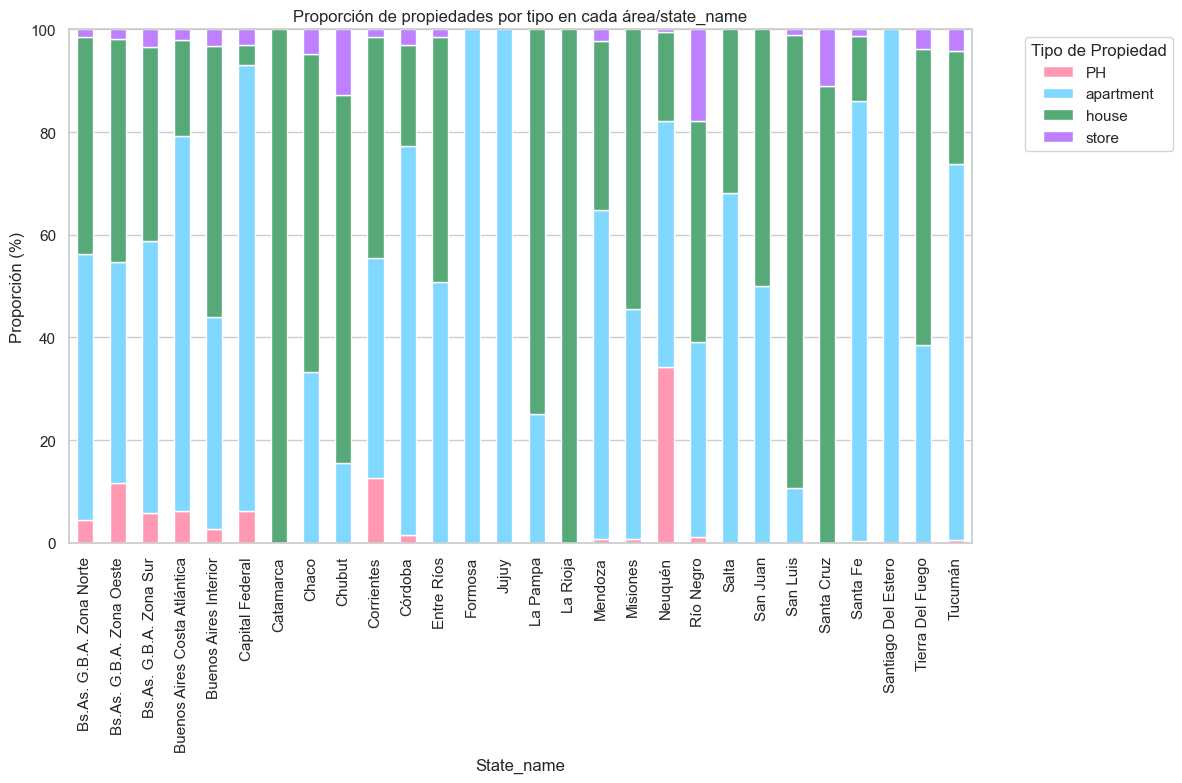

In [136]:
property_counts = data_res_clean.groupby(['state_name', 'property_type']).size().unstack().fillna(0)
property_proportions = property_counts.div(property_counts.sum(axis=1), axis=0) * 100

property_proportions.plot(kind='bar', stacked=True, color=palette_dict, figsize=(12, 8))
plt.title('Proporción de propiedades por tipo en cada área/state_name')
plt.xlabel('State_name')
plt.ylabel('Proporción (%)')
plt.legend(title='Tipo de Propiedad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


Generamos una tabla pivot para poder observar, por cada state_name, la cantidad total de propiedades, la cantidad por tipo de propiedad y el porcentaje que representa de las propiedades totales de cada uno.

In [137]:
property_counts = data_res_clean.groupby('state_name')['property_type'].value_counts().unstack(fill_value=0)

total_properties = property_counts.sum(axis=1)

property_proportions = (property_counts.div(total_properties, axis=0) * 100).round(2)

property_counts['Total_Properties'] = total_properties

pivot_table_state_proptype = pd.concat([property_counts, property_proportions], axis=1)

pivot_table_state_proptype.columns = ['House', 'Apartment', 'PH', 'Store', 'Total_Properties', 'Prop_House (%)', 'Prop_Apartment (%)', 'Prop_PH (%)', 'Prop_Store (%)']
pivot_table_state_proptype

,House,Apartment,PH,Store,Total_Properties,Prop_House (%),Prop_Apartment (%),Prop_PH (%),Prop_Store (%)
state_name,,,,,,,,,
Bs.As. G.B.A. Zona Norte,610,7012,5718,213,13553,4.50,51.74,42.19,1.57
Bs.As. G.B.A. Zona Oeste,468,1740,1762,73,4043,11.58,43.04,43.58,1.81
Bs.As. G.B.A. Zona Sur,316,2916,2073,184,5489,5.76,53.12,37.77,3.35
Buenos Aires Costa Atlántica,350,4090,1042,117,5599,6.25,73.05,18.61,2.09
Buenos Aires Interior,20,299,382,24,725,2.76,41.24,52.69,3.31
Capital Federal,1243,17456,782,607,20088,6.19,86.90,3.89,3.02
Catamarca,0,0,4,0,4,0.00,0.00,100.00,0.00
Chaco,0,7,13,1,21,0.00,33.33,61.90,4.76
Chubut,0,17,79,14,110,0.00,15.45,71.82,12.73


Generamos un top y bottom 5 para los state_names con mayor y menor proporción de cada tipo de propiedad

In [138]:
# Top 5
top_house = pivot_table_state_proptype['Prop_House (%)'].nlargest(5)
top_apartment = pivot_table_state_proptype['Prop_Apartment (%)'].nlargest(5)
top_ph = pivot_table_state_proptype['Prop_PH (%)'].nlargest(5)
top_store = pivot_table_state_proptype['Prop_Store (%)'].nlargest(5)

# Bottom 5
bottom_house = pivot_table_state_proptype['Prop_House (%)'].nsmallest(5)
bottom_apartment = pivot_table_state_proptype['Prop_Apartment (%)'].nsmallest(5)
bottom_ph = pivot_table_state_proptype['Prop_PH (%)'].nsmallest(5)
bottom_store = pivot_table_state_proptype['Prop_Store (%)'].nsmallest(5)

print("Top 5 de state_names con mayor proporción de cada tipo de propiedad:")
print("Top House:\n", top_house)
print("\nTop Apartment:\n", top_apartment)
print("\nTop PH:\n", top_ph)
print("\nTop Store:\n", top_store)

print("\nBottom 5 de state_names con menor proporción de cada tipo de propiedad:")
print("Bottom House:\n", bottom_house)
print("\nBottom Apartment:\n", bottom_apartment)
print("\nBottom PH:\n", bottom_ph)
print("\nBottom Store:\n", bottom_store)


Top 5 de state_names con mayor proporción de cada tipo de propiedad:
Top House:
 state_name
Neuquén                         34.18
Corrientes                      12.59
Bs.As. G.B.A. Zona Oeste        11.58
Buenos Aires Costa Atlántica     6.25
Capital Federal                  6.19
Name: Prop_House (%), dtype: float64

Top Apartment:
 state_name
Formosa                100.00
Jujuy                  100.00
Santiago Del Estero    100.00
Capital Federal         86.90
Santa Fe                85.71
Name: Prop_Apartment (%), dtype: float64

Top PH:
 state_name
Catamarca     100.00
La Rioja      100.00
Santa Cruz     88.89
San Luis       88.24
La Pampa       75.00
Name: Prop_PH (%), dtype: float64

Top Store:
 state_name
Río Negro     17.93
Chubut        12.73
Santa Cruz    11.11
Chaco          4.76
Tucumán        4.17
Name: Prop_Store (%), dtype: float64

Bottom 5 de state_names con menor proporción de cada tipo de propiedad:
Bottom House:
 state_name
Catamarca     0.0
Chaco         0.0
Chubut

<u> Conclusión de ambos análsis (pivot y top/bottom2): como es de esperar, los departamentos fueron más prevalentes en la Capital Federal y GBA, Córdoba y Santa Fe, áreas con la mayor cantidad de propiedades y por ende muestras mayores. Sin embargo, las proporciones observadas en top/bottom se vieron afectadas por la escasa cantidad de propiedades publicadas en otras provincias (tal es el caso de Formosa, que aparece segunda en proporción de departamentos (>81% de las propiedades) pero no representa una provincia con una gran cantidad de departamentos en sí, lo cual puede significar que es una muestra pequeña para ser evaluada de esta forma). Hubo algunas áreas en las que no existieron casas o locales publicados.

## <u> Conclusiones Generales

- Limitaciones del dataset bruto: columnas con valores no estandarizados, alta proporción de valores faltantes y nulos, también de valores erróneos y outliers. 

- Se recurrió a una combinación de estrategias para eliminar valores atípicos, faltantes, errores de formato, normalización e intento de resolución de inconsistencias.

- Consideramos que alcanzamos un resultado muy satisfactorio en el proceso de data cleaning y data wrangling, utilizando valores dentro del propio dataset para mejorar la propoción de valores nulos en las columnas prioritarias.

- Las publicaciones del dataset corresponden principalmente al tipo de inmueble 'departamento' y 'casa', ubicados en CABA, GBA y de forma más minoritaria en Córdoba y Santa Fe. Otras provincias y el tipo de inmueble 'local' están menos representados, lo cual hace que la muestra se encuentre desbalanceada para realizar ciertos tipos de análisis estadístico a partir de categorías o sub-muestras.

- Dados los objetivos del TP, focalizamos el análisis en el estudio de las posibles variables de impacto sobre el precio USD/m2 (precio).

- La distribución de la variable precio USD/m2 es similar entre los diferentes tipos de inmueble, especialmente casas y PH. Los departamentos y los locales mostraron mayor variabilidad y una media apenas mayor de esta variable, como puede verse en el violin plot.

- En cuanto al precio USD/m2, existiría una relación estadística positiva entre estar ubicado en CABA y el precio USD/m2 para todos los tipos de inmueble. 

- Otra correlación posible involucra una relación inversa entre superficie total y precio USD/m2.